In [1]:
import pandas as pd
import glob
from twarc import Twarc
# import networkx as nx
# import igraph as ig
# import plotly.offline as py
# import plotly.graph_objs as go
import seaborn as sns

from tqdm import tqdm, tqdm_notebook
import sys
# sys.path.append('/home/santiago/github/secom_twitter/twitter/')
# from update_users_from_google import get_engine
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (13.0, 10.0)
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'font.family': 'symbola'})



In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
casos = 300

In [4]:
df = pd.read_csv(url)
df = df.drop(["Province/State", "Lat", "Long"], axis=1)
df2 = df.groupby('Country/Region').sum().T
df2.index = pd.to_datetime(df2.index)

In [5]:
df2.loc['2020-03-19 00:00:00', 'Chile'] = 342
df2.loc['2020-04-03 00:00:00', 'Chile'] = 3737

In [197]:
paises_sobre_200 = (df2 > casos).sum()
paises_sobre_200_lista = paises_sobre_200[paises_sobre_200 > 0].index.tolist()

df3 = df2[paises_sobre_200_lista][(df2[paises_sobre_200_lista] > 0) & (df2[paises_sobre_200_lista] <= casos)].count()

# df3['Chile'] = 14

ax = df3.drop(['China', 'Cruise Ship']).sort_values().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.007))
ax.get_children()[8].set_color('r')
ax.set_title('Días que tardó el Coronavirus en sobrepasar los {} casos por País'.format(casos))
ax.text(-1, -10, "@slarrain", 
#         color='grey', 
#         fontweight='bold'
       )
ax.text(21, -10, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
       )
plt.savefig("dias_para_{}_casos_pais.png".format(casos), bbox_inches='tight')

KeyError: "['Cruise Ship'] not found in axis"

In [14]:
df2

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19,22,64,87,53,0,1,97,115,681,2013,...,0,16,140,2716,79,23,42,85,2,0
2020-03-20,24,70,90,75,1,1,128,136,791,2388,...,0,29,140,4014,94,33,42,91,2,1
2020-03-21,24,76,139,88,2,1,158,160,1071,2814,...,1,47,153,5067,110,43,70,94,2,3
2020-03-22,40,89,201,113,2,1,266,194,1549,3582,...,1,73,153,5745,158,43,70,113,3,3


In [15]:
df2['Chile']

2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
             ... 
2020-03-19    238
2020-03-20    434
2020-03-21    537
2020-03-22    632
2020-03-23    746
Name: Chile, Length: 62, dtype: int64

In [20]:
df2[df2 > 100].diff()['Chile']

2020-01-22      NaN
2020-01-23      NaN
2020-01-24      NaN
2020-01-25      NaN
2020-01-26      NaN
              ...  
2020-03-19      0.0
2020-03-20    196.0
2020-03-21    103.0
2020-03-22     95.0
2020-03-23    114.0
Name: Chile, Length: 62, dtype: float64

In [31]:
df2[df2 > 100].diff()['US'].pct_change() 

2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
                ...   
2020-03-19    3.327460
2020-03-20   -0.079912
2020-03-21    0.178130
2020-03-22    0.218814
2020-03-23    0.357519
Name: US, Length: 62, dtype: float64

In [38]:
df2[df2 > 100].diff()['US'].tail(10)

2020-03-14      548.0
2020-03-15      772.0
2020-03-16     1133.0
2020-03-17     1789.0
2020-03-18     1362.0
2020-03-19     5894.0
2020-03-20     5423.0
2020-03-21     6389.0
2020-03-22     7787.0
2020-03-23    10571.0
Name: US, dtype: float64

In [49]:
df2[df2 > 100]['US'].pct_change().tail(10) 

2020-03-14    0.251492
2020-03-15    0.283095
2020-03-16    0.323807
2020-03-17    0.386226
2020-03-18    0.212116
2020-03-19    0.757292
2020-03-20    0.396505
2020-03-21    0.334503
2020-03-22    0.305504
2020-03-23    0.317676
Name: US, dtype: float64

In [74]:
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Grenada,12.116500,-61.679000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
234,NaN,Mozambique,-18.665695,35.529562,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
235,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [36]:
df[df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847


In [42]:
df2['US'].tail(10)

2020-03-14     2727
2020-03-15     3499
2020-03-16     4632
2020-03-17     6421
2020-03-18     7783
2020-03-19    13677
2020-03-20    19100
2020-03-21    25489
2020-03-22    33276
2020-03-23    43847
Name: US, dtype: int64

In [92]:
2 ==  True

False

In [96]:
def growth_factor_over_100(df2, country='Chile', dias=100):
    print (country, dias)
    if df2 is None:
        df = pd.read_csv(url)
        df = df.drop(["Province/State", "Lat", "Long"], axis=1)
        df2 = df.groupby('Country/Region').sum().T
        df2.index = pd.to_datetime(df2.index)
    dfc = df2[df2 > dias][country]
    return dfc.diff().div(dfc.diff().shift(1))


In [53]:
us = df2[df2 > 100]['US']

In [89]:
us.diff().div(us.diff().shift(1))

2020-01-22 00:00:00         NaN
2020-01-23 00:00:00         NaN
2020-01-24 00:00:00         NaN
2020-01-25 00:00:00         NaN
2020-01-26 00:00:00         NaN
                         ...   
2020-03-20 00:00:00    0.920088
2020-03-21 00:00:00    1.178130
2020-03-22 00:00:00    1.218814
2020-03-23 00:00:00    1.357519
2020-03-24             0.744679
Name: US, Length: 63, dtype: float64

In [85]:
us.diff().div(us.diff().shift(1)).mean()

1.6279426583055332

In [91]:
us.diff().div(us.diff().shift(1)).tail(10).mean()

1.496337809460719

In [59]:
us.diff()

2020-01-22        NaN
2020-01-23        NaN
2020-01-24        NaN
2020-01-25        NaN
2020-01-26        NaN
               ...   
2020-03-19     5894.0
2020-03-20     5423.0
2020-03-21     6389.0
2020-03-22     7787.0
2020-03-23    10571.0
Name: US, Length: 62, dtype: float64

In [61]:
us.diff().shift(-1)

2020-01-22        NaN
2020-01-23        NaN
2020-01-24        NaN
2020-01-25        NaN
2020-01-26        NaN
               ...   
2020-03-19     5423.0
2020-03-20     6389.0
2020-03-21     7787.0
2020-03-22    10571.0
2020-03-23        NaN
Name: US, Length: 62, dtype: float64

In [60]:
10571/7787

1.3575189418261204

In [68]:
us.tail(23)

2020-03-01        NaN
2020-03-02        NaN
2020-03-03      118.0
2020-03-04      149.0
2020-03-05      217.0
2020-03-06      262.0
2020-03-07      402.0
2020-03-08      518.0
2020-03-09      583.0
2020-03-10      959.0
2020-03-11     1281.0
2020-03-12     1663.0
2020-03-13     2179.0
2020-03-14     2727.0
2020-03-15     3499.0
2020-03-16     4632.0
2020-03-17     6421.0
2020-03-18     7783.0
2020-03-19    13677.0
2020-03-20    19100.0
2020-03-21    25489.0
2020-03-22    33276.0
2020-03-23    43847.0
Name: US, dtype: float64

In [79]:
df[df['Province/State'].notnull()]['Country/Region'].value_counts()

China             33
Canada            12
France             9
Australia          8
United Kingdom     6
Netherlands        3
Denmark            2
Cruise Ship        1
Name: Country/Region, dtype: int64

In [80]:
chile = df2[df2 > 100]['Chile']

In [81]:
chile

2020-01-22      NaN
2020-01-23      NaN
2020-01-24      NaN
2020-01-25      NaN
2020-01-26      NaN
              ...  
2020-03-19    238.0
2020-03-20    434.0
2020-03-21    537.0
2020-03-22    632.0
2020-03-23    746.0
Name: Chile, Length: 62, dtype: float64

In [82]:
chile['2020-03-24'] = 922
chile

2020-01-22 00:00:00      NaN
2020-01-23 00:00:00      NaN
2020-01-24 00:00:00      NaN
2020-01-25 00:00:00      NaN
2020-01-26 00:00:00      NaN
                       ...  
2020-03-20 00:00:00    434.0
2020-03-21 00:00:00    537.0
2020-03-22 00:00:00    632.0
2020-03-23 00:00:00    746.0
2020-03-24             922.0
Name: Chile, Length: 63, dtype: float64

In [83]:
us['2020-03-24'] = 51719

In [84]:
us

2020-01-22 00:00:00        NaN
2020-01-23 00:00:00        NaN
2020-01-24 00:00:00        NaN
2020-01-25 00:00:00        NaN
2020-01-26 00:00:00        NaN
                        ...   
2020-03-20 00:00:00    19100.0
2020-03-21 00:00:00    25489.0
2020-03-22 00:00:00    33276.0
2020-03-23 00:00:00    43847.0
2020-03-24             51719.0
Name: US, Length: 63, dtype: float64

In [87]:
us.diff()

2020-01-22 00:00:00        NaN
2020-01-23 00:00:00        NaN
2020-01-24 00:00:00        NaN
2020-01-25 00:00:00        NaN
2020-01-26 00:00:00        NaN
                        ...   
2020-03-20 00:00:00     5423.0
2020-03-21 00:00:00     6389.0
2020-03-22 00:00:00     7787.0
2020-03-23 00:00:00    10571.0
2020-03-24              7872.0
Name: US, Length: 63, dtype: float64

In [88]:
us

2020-01-22 00:00:00        NaN
2020-01-23 00:00:00        NaN
2020-01-24 00:00:00        NaN
2020-01-25 00:00:00        NaN
2020-01-26 00:00:00        NaN
                        ...   
2020-03-20 00:00:00    19100.0
2020-03-21 00:00:00    25489.0
2020-03-22 00:00:00    33276.0
2020-03-23 00:00:00    43847.0
2020-03-24             51719.0
Name: US, Length: 63, dtype: float64

In [113]:
chile = growth_factor_over_100(df2)
chile.mean()

Chile 100


1.3265041407306633

In [114]:
chile.tail(15)

2020-03-10 00:00:00         NaN
2020-03-11 00:00:00         NaN
2020-03-12 00:00:00         NaN
2020-03-13 00:00:00         NaN
2020-03-14 00:00:00         NaN
2020-03-15 00:00:00         NaN
2020-03-16 00:00:00         NaN
2020-03-17 00:00:00         NaN
2020-03-18 00:00:00    0.804348
2020-03-19 00:00:00    2.810811
2020-03-20 00:00:00    0.884615
2020-03-21 00:00:00    1.119565
2020-03-22 00:00:00    0.922330
2020-03-23 00:00:00    1.200000
2020-03-24             1.543860
Name: Chile, dtype: float64

In [102]:
df2[df2>100]['Chile'].tail(15)

2020-03-09      NaN
2020-03-10      NaN
2020-03-11      NaN
2020-03-12      NaN
2020-03-13      NaN
2020-03-14      NaN
2020-03-15      NaN
2020-03-16    155.0
2020-03-17    201.0
2020-03-18    238.0
2020-03-19    238.0
2020-03-20    434.0
2020-03-21    537.0
2020-03-22    632.0
2020-03-23    746.0
Name: Chile, dtype: float64

In [112]:
df2[df2>100]['Chile'].diff().div(df2[df2>100]['Chile'].diff().shift(1)).tail(10)

2020-03-15 00:00:00         NaN
2020-03-16 00:00:00         NaN
2020-03-17 00:00:00         NaN
2020-03-18 00:00:00    0.804348
2020-03-19 00:00:00    2.810811
2020-03-20 00:00:00    0.884615
2020-03-21 00:00:00    1.119565
2020-03-22 00:00:00    0.922330
2020-03-23 00:00:00    1.200000
2020-03-24             1.543860
Name: Chile, dtype: float64

In [110]:
df2[df2>100]['Chile'].diff().tail(10)

2020-03-14      NaN
2020-03-15      NaN
2020-03-16      NaN
2020-03-17     46.0
2020-03-18     37.0
2020-03-19    104.0
2020-03-20     92.0
2020-03-21    103.0
2020-03-22     95.0
2020-03-23    114.0
Name: Chile, dtype: float64

In [109]:
df2[df2>100]['Chile'].diff().shift(1).tail(10)

2020-03-14      NaN
2020-03-15      NaN
2020-03-16      NaN
2020-03-17      NaN
2020-03-18     46.0
2020-03-19     37.0
2020-03-20    104.0
2020-03-21     92.0
2020-03-22    103.0
2020-03-23     95.0
Name: Chile, dtype: float64

In [111]:
df2.loc['2020-03-19', 'Chile'] = 342
df2.loc['2020-03-24', 'Chile'] = 922

In [115]:
df2['Spain']

2020-01-22 00:00:00        0.0
2020-01-23 00:00:00        0.0
2020-01-24 00:00:00        0.0
2020-01-25 00:00:00        0.0
2020-01-26 00:00:00        0.0
                        ...   
2020-03-20 00:00:00    20410.0
2020-03-21 00:00:00    25374.0
2020-03-22 00:00:00    28768.0
2020-03-23 00:00:00    35136.0
2020-03-24                 NaN
Name: Spain, Length: 63, dtype: float64

In [116]:
df2.loc['2020-03-24', 'Spain'] = 39673

In [117]:
spain = growth_factor_over_100(df2, 'Spain')

Spain 100


In [122]:
spain.tail(15)

2020-03-10 00:00:00    1.555000
2020-03-11 00:00:00    0.935691
2020-03-12 00:00:00    0.000000
2020-03-13 00:00:00         inf
2020-03-14 00:00:00    0.392217
2020-03-15 00:00:00    1.213978
2020-03-16 00:00:00    1.523810
2020-03-17 00:00:00    0.842351
2020-03-18 00:00:00    1.197121
2020-03-19 00:00:00    1.874653
2020-03-20 00:00:00    0.603750
2020-03-21 00:00:00    2.028606
2020-03-22 00:00:00    0.683723
2020-03-23 00:00:00    1.876252
2020-03-24             0.712469
Name: Spain, dtype: float64

In [123]:
df2['Spain'].tail(15)

2020-03-10 00:00:00     1695.0
2020-03-11 00:00:00     2277.0
2020-03-12 00:00:00     2277.0
2020-03-13 00:00:00     5232.0
2020-03-14 00:00:00     6391.0
2020-03-15 00:00:00     7798.0
2020-03-16 00:00:00     9942.0
2020-03-17 00:00:00    11748.0
2020-03-18 00:00:00    13910.0
2020-03-19 00:00:00    17963.0
2020-03-20 00:00:00    20410.0
2020-03-21 00:00:00    25374.0
2020-03-22 00:00:00    28768.0
2020-03-23 00:00:00    35136.0
2020-03-24             39673.0
Name: Spain, dtype: float64

In [125]:
import requests
json = requests.get('https://pomber.github.io/covid19/timeseries.json').json()

In [128]:
pd.from(json)

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [133]:
pd.DataFrame.from_dict(json, 'index')

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
Afghanistan,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-27', 'confirmed': 0, 'deaths'...","{'date': '2020-1-28', 'confirmed': 0, 'deaths'...","{'date': '2020-1-29', 'confirmed': 0, 'deaths'...","{'date': '2020-1-30', 'confirmed': 0, 'deaths'...","{'date': '2020-1-31', 'confirmed': 0, 'deaths'...",...,"{'date': '2020-3-14', 'confirmed': 11, 'deaths...","{'date': '2020-3-15', 'confirmed': 16, 'deaths...","{'date': '2020-3-16', 'confirmed': 21, 'deaths...","{'date': '2020-3-17', 'confirmed': 22, 'deaths...","{'date': '2020-3-18', 'confirmed': 22, 'deaths...","{'date': '2020-3-19', 'confirmed': 22, 'deaths...","{'date': '2020-3-20', 'confirmed': 24, 'deaths...","{'date': '2020-3-21', 'confirmed': 24, 'deaths...","{'date': '2020-3-22', 'confirmed': 40, 'deaths...","{'date': '2020-3-23', 'confirmed': 40, 'deaths..."
Albania,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-27', 'confirmed': 0, 'deaths'...","{'date': '2020-1-28', 'confirmed': 0, 'deaths'...","{'date': '2020-1-29', 'confirmed': 0, 'deaths'...","{'date': '2020-1-30', 'confirmed': 0, 'deaths'...","{'date': '2020-1-31', 'confirmed': 0, 'deaths'...",...,"{'date': '2020-3-14', 'confirmed': 38, 'deaths...","{'date': '2020-3-15', 'confirmed': 42, 'deaths...","{'date': '2020-3-16', 'confirmed': 51, 'deaths...","{'date': '2020-3-17', 'confirmed': 55, 'deaths...","{'date': '2020-3-18', 'confirmed': 59, 'deaths...","{'date': '2020-3-19', 'confirmed': 64, 'deaths...","{'date': '2020-3-20', 'confirmed': 70, 'deaths...","{'date': '2020-3-21', 'confirmed': 76, 'deaths...","{'date': '2020-3-22', 'confirmed': 89, 'deaths...","{'date': '2020-3-23', 'confirmed': 104, 'death..."
Algeria,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-27', 'confirmed': 0, 'deaths'...","{'date': '2020-1-28', 'confirmed': 0, 'deaths'...","{'date': '2020-1-29', 'confirmed': 0, 'deaths'...","{'date': '2020-1-30', 'confirmed': 0, 'deaths'...","{'date': '2020-1-31', 'confirmed': 0, 'deaths'...",...,"{'date': '2020-3-14', 'confirmed': 37, 'deaths...","{'date': '2020-3-15', 'confirmed': 48, 'deaths...","{'date': '2020-3-16', 'confirmed': 54, 'deaths...","{'date': '2020-3-17', 'confirmed': 60, 'deaths...","{'date': '2020-3-18', 'confirmed': 74, 'deaths...","{'date': '2020-3-19', 'confirmed': 87, 'deaths...","{'date': '2020-3-20', 'confirmed': 90, 'deaths...","{'date': '2020-3-21', 'confirmed': 139, 'death...","{'date': '2020-3-22', 'confirmed': 201, 'death...","{'date': '2020-3-23', 'confirmed': 230, 'death..."
Andorra,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-27', 'confirmed': 0, 'deaths'...","{'date': '2020-1-28', 'confirmed': 0, 'deaths'...","{'date': '2020-1-29', 'confirmed': 0, 'deaths'...","{'date': '2020-1-30', 'confirmed': 0, 'deaths'...","{'date': '2020-1-31', 'confirmed': 0, 'deaths'...",...,"{'date': '2020-3-14', 'confirmed': 1, 'deaths'...","{'date': '2020-3-15', 'confirmed': 1, 'deaths'...","{'date': '2020-3-16', 'confirmed': 2, 'deaths'...","{'date': '2020-3-17', 'confirmed': 39, 'deaths...","{'date': '2020-3-18', 'confirmed': 39, 'deat

In [134]:
json['Spain']

[{'date': '2020-1-22', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-23', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-24', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-25', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-26', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-27', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-28', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-29', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-30', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-1-31', 'confirmed': 0, 'deaths': 0, 'recovered': 0},
 {'date': '2020-2-1', 'confirmed': 1, 'deaths': 0, 'recovered': 0},
 {'date': '2020-2-2', 'confirmed': 1, 'deaths': 0, 'recovered': 0},
 {'date': '2020-2-3', 'confirmed': 1, 'deaths': 0, 'recovered': 0},
 {'date': '2020-2-4', 'confirmed': 1, 'deaths': 0, 'recovered': 0},
 {'date': '2020-2-5', 'confirmed': 1, 

In [198]:
## Casos de 100 a 1000

In [236]:
casos_min = 100
casos_max = 1000
paises_sobre_x = (df2 > casos_max).sum()
paises_sobre_x_lista = paises_sobre_x[paises_sobre_x > 0].index.tolist()

In [237]:
paises_sobre_x_lista

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, South',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'US',
 'United Kingdom']

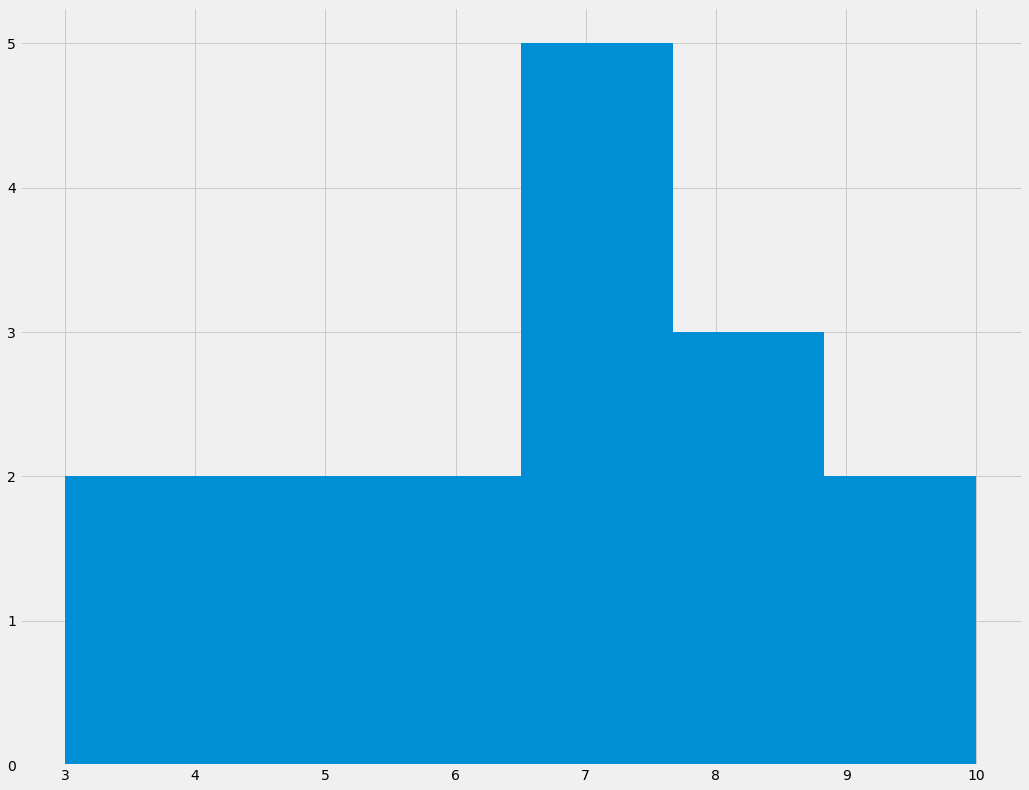

In [39]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().hist(bins=6)

In [238]:
mean = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().mean()
mean

9.957446808510639

In [239]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum()

Country/Region
Argentina             11
Australia             11
Austria                8
Belgium               10
Brazil                 8
Canada                10
Chile                  9
China                  3
Czechia                9
Denmark                7
Dominican Republic    10
Ecuador                6
Finland               14
France                 8
Germany                7
Greece                15
Iceland               17
India                 15
Indonesia             12
Iran                   5
Ireland                9
Israel                11
Italy                  6
Japan                 29
Korea, South           6
Luxembourg             7
Malaysia              11
Mexico                12
Netherlands            9
Norway                 8
Pakistan               9
Panama                12
Peru                  14
Philippines           14
Poland                11
Portugal               7
Romania               12
Russia                10
Saudi Arabia          12
South Afri

In [240]:
len(((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum())

47

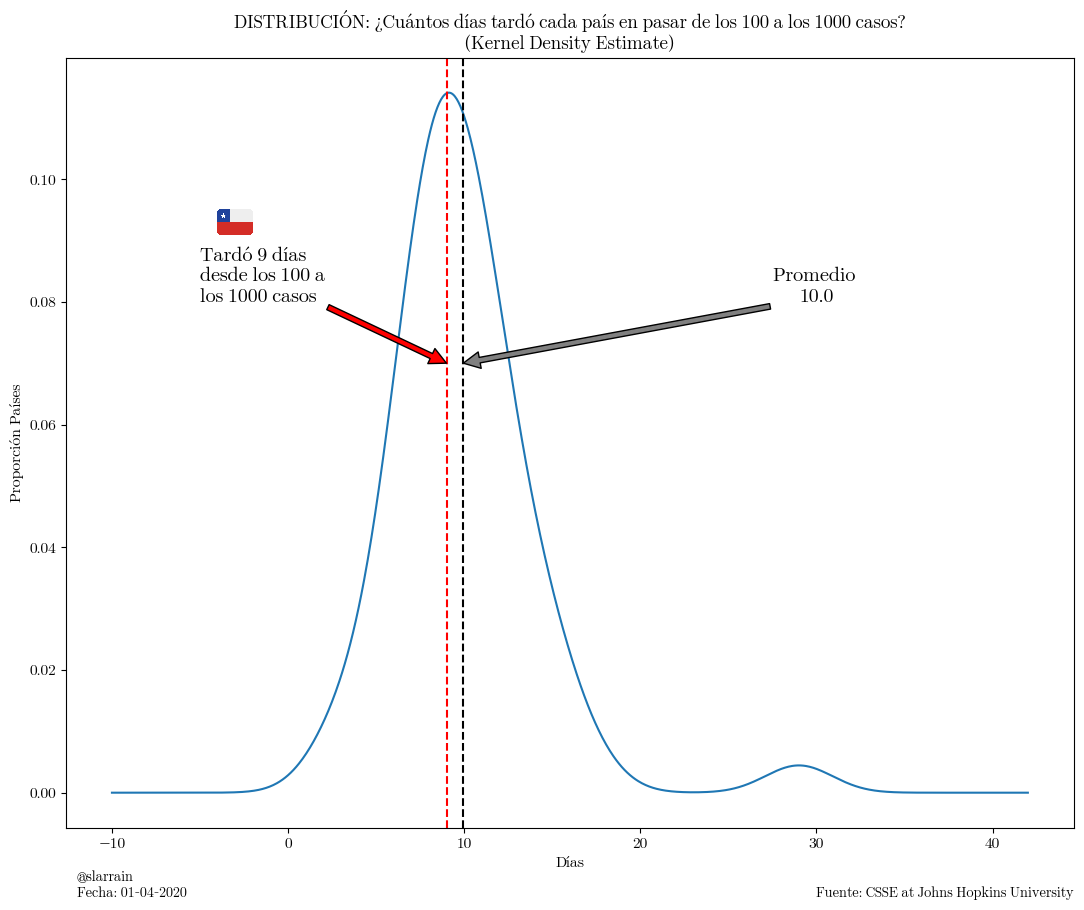

In [241]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().plot.kde()
ax.set(
    title='DISTRIBUCIÓN: ¿Cuántos días tardó cada país en pasar de los {} a los {} casos?\n(Kernel Density Estimate)'.format(casos_min, casos_max),
    xlabel="Días", 
    ylabel="Proporción Países",
)
# plt.suptitle('Distribución')
plt.axvline(x=mean, ls='dashed', color='black')
# plt.axvline(x=7, 
# #             ls=, 
#             color='yellow')


### 100 a 1000
plt.axvline(x=9, ls='dashed', color='red')
ax.annotate(
    """Tardó 9 días
desde los 100 a
los 1000 casos""",
    xy=(
#         mean-0.01, 0.12  # 1000 a 5000
        9 - 0.01, 0.07  # 100 a 1000
       ), 
    xytext=(
#         0, 0.15  # 1000 a 5000
        -5, 0.08  # 100 a 1000
    ), 
    fontsize=14,
    horizontalalignment='left',
    arrowprops=dict(facecolor='red', shrink=1)
)
### 100 a 1000

ax.annotate(
    "Promedio \n{:.1f}".format(mean), 
    xy=(
#         mean-0.01, 0.12  # 1000 a 5000
        mean - 0.01, 0.07  # 100 a 1000
       ), 
    xytext=(
#         0, 0.15  # 1000 a 5000
        30, 0.08  # 100 a 1000
    ), 
    fontsize=14,
    horizontalalignment='center',
    arrowprops=dict(facecolor='gray', shrink=1)
)

# texto = """Lleva 7 días desde que 
# superó los mil casos
# y tiene 2738 contagiados"""
# ax.text(
#     10,
#     0.18,
#     texto, 
#     fontweight='bold', 
#     bbox=dict(facecolor='none', edgecolor='#fc4f30', boxstyle='round')
# )


imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.05)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (-3, 0.093),
    frameon=False)
ax.add_artist(ab)

ax.text(-12, -0.017, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(30, -0.017, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
plt.savefig("figs/DISTRIBUCION_dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')

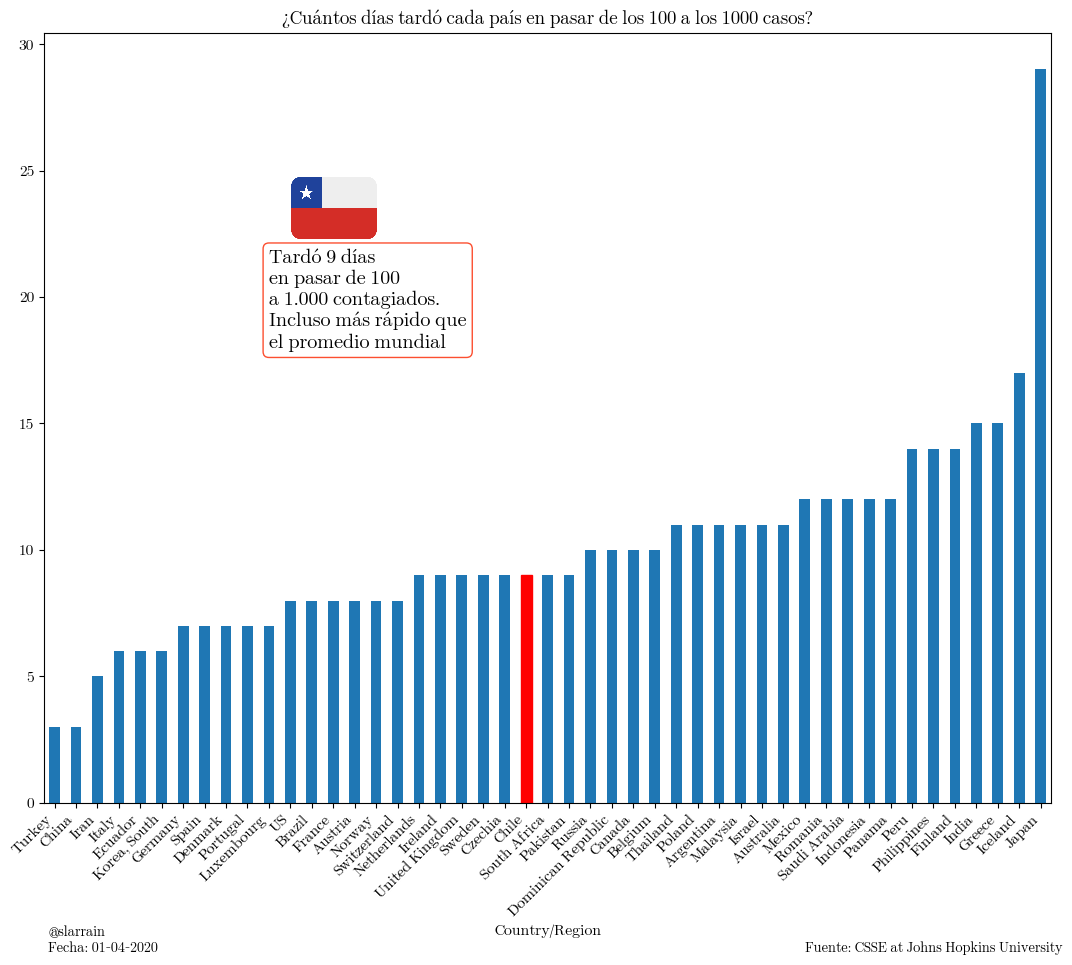

In [243]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().sort_values().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.007))
# ax.get_children()[8].set_color('r')
ax.set_title('¿Cuántos días tardó cada país en pasar de los {} a los {} casos?'.format(casos_min, casos_max))
ax.text(-0.3, -5.9, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(35, -5.9, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
texto = """Tardó 9 días
en pasar de 100
a 1.000 contagiados.
Incluso más rápido que
el promedio mundial"""
ax.text(
    10,
    18,
    texto, 
    fontweight='bold',
    fontsize=14,
    bbox=dict(facecolor='none', edgecolor='#fc4f30', boxstyle='round')
)

im = image.imread('/home/santiago/Downloads/chile.png')

imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.12)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (13, 23.5),
    frameon=False)
ax.add_artist(ab)
# plt.axhline(y=8, ls='dashed', color='black')
# plt.axvline(x='2017-06-18', ls='dashed', color='black')
ax.get_children()[22].set_color('r')
plt.savefig("figs/dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')

In [199]:
### Casos de 1000 a 5000

In [223]:
casos_min = 1000
casos_max = 5000
paises_sobre_x = (df2 > casos_max).sum()
paises_sobre_x_lista = paises_sobre_x[paises_sobre_x > 0].index.tolist()

In [224]:
paises_sobre_x_lista

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'France',
 'Germany',
 'Iran',
 'Israel',
 'Italy',
 'Korea, South',
 'Netherlands',
 'Norway',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'US',
 'United Kingdom']

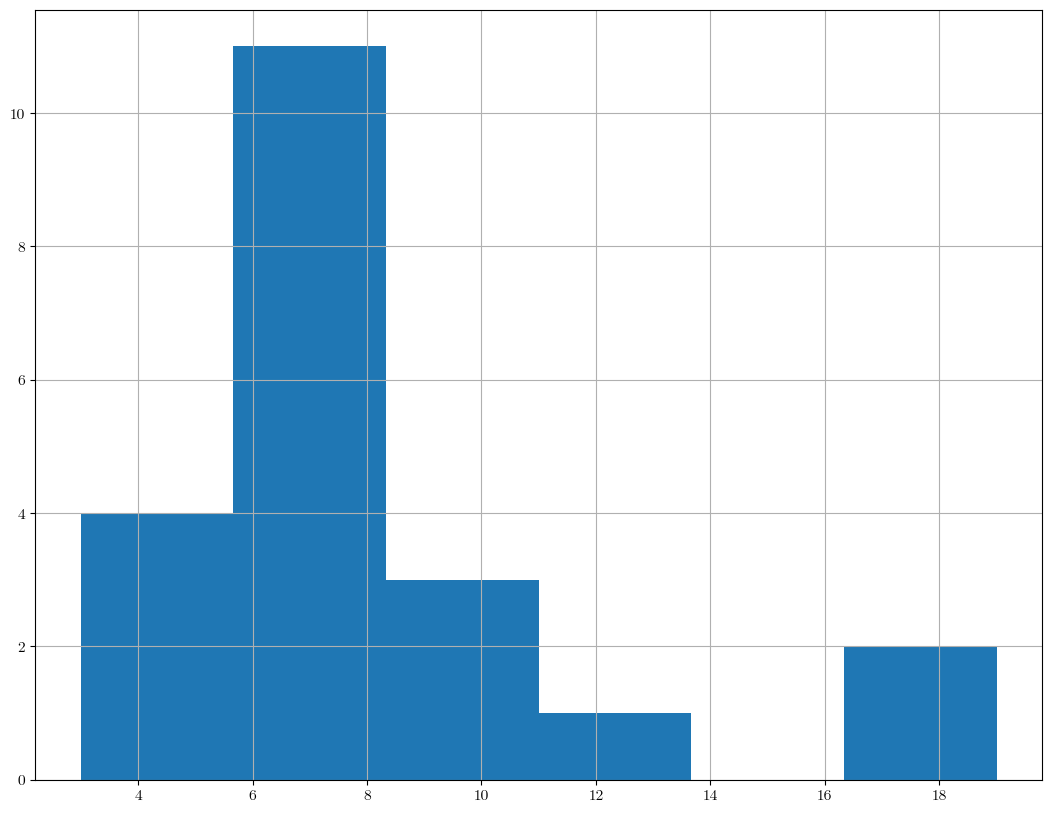

In [225]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().hist(bins=6)

In [226]:
mean = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().mean()
mean

8.285714285714286

In [227]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum()

Country/Region
Australia         12
Austria            8
Belgium           10
Brazil            10
Canada             7
China              3
France             8
Germany            7
Iran               5
Israel             8
Italy              7
Korea, South       6
Netherlands        9
Norway            19
Portugal           8
Spain              4
Sweden            18
Switzerland        7
Turkey             5
US                 6
United Kingdom     7
dtype: int64

In [228]:
len(((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum())

21

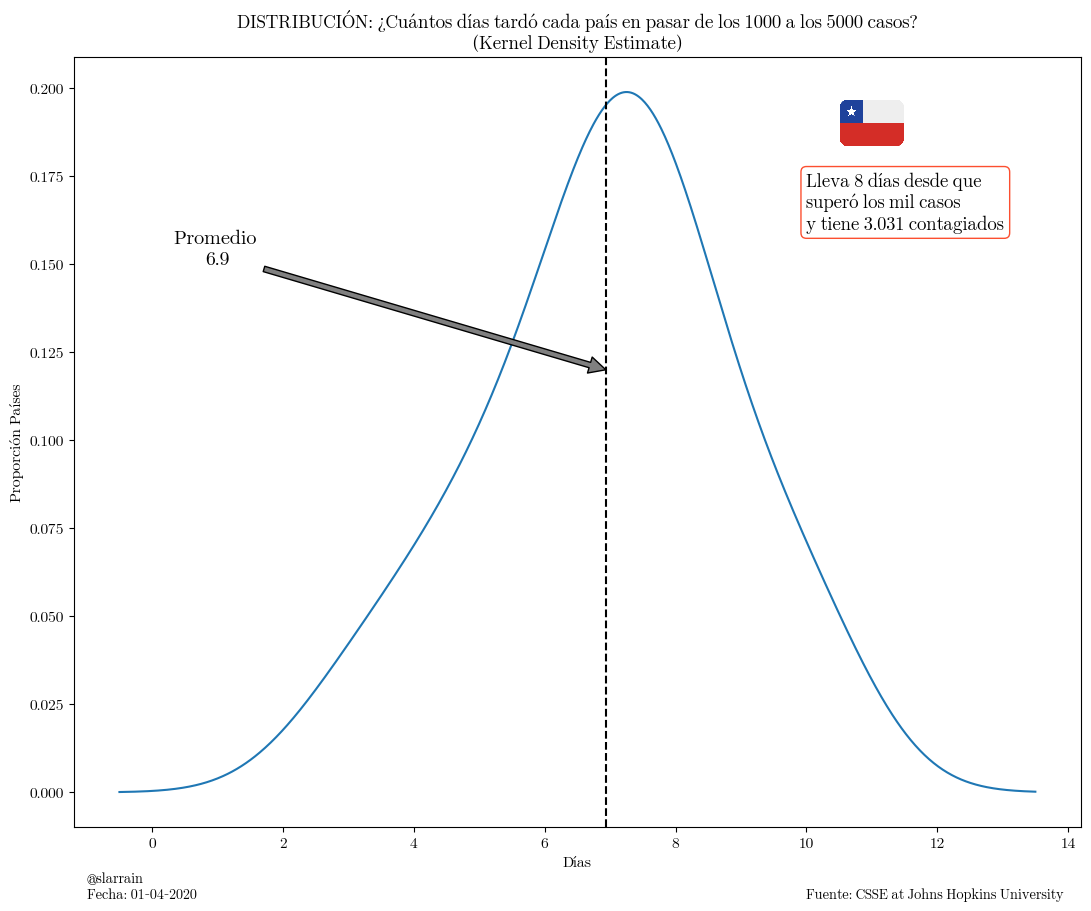

In [254]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().plot.kde()
ax.set(
    title='DISTRIBUCIÓN: ¿Cuántos días tardó cada país en pasar de los {} a los {} casos?\n(Kernel Density Estimate)'.format(casos_min, casos_max),
    xlabel="Días", 
    ylabel="Proporción Países",
)
# plt.suptitle('Distribución')
plt.axvline(x=mean, ls='dashed', color='black')
# plt.axvline(x=7, 
# #             ls=, 
#             color='yellow')


### 100 a 1000
# plt.axvline(x=9, ls='dashed', color='red')
# ax.annotate(
#     "Promedio \n{:.1f}".format(mean), 
#     xy=(
# #         mean-0.01, 0.12  # 1000 a 5000
#         9 - 0.01, 0.07  # 100 a 1000
#        ), 
#     xytext=(
# #         0, 0.15  # 1000 a 5000
#         -10, 0.08  # 100 a 1000
#     ), 
#     fontsize=14,
#     horizontalalignment='center',
#     arrowprops=dict(facecolor='gray', shrink=1)
# )
### 100 a 1000

ax.annotate(
    "Promedio \n{:.1f}".format(mean), 
    xy=(
        mean-0.01, 0.12  # 1000 a 5000
#         mean - 0.01, 0.07  # 100 a 1000
       ), 
    xytext=(
        1, 0.15  # 1000 a 5000
#         30, 0.08  # 100 a 1000
    ), 
    fontsize=14,
    horizontalalignment='center',
    arrowprops=dict(facecolor='gray', shrink=1)
)

texto = """Lleva 8 días desde que 
superó los mil casos
y tiene 3.031 contagiados"""
ax.text(
    10,
    0.16,
    texto, 
    fontweight='bold',
    fontsize=13,
    bbox=dict(facecolor='none', edgecolor='#fc4f30', boxstyle='round')
)


imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.09)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (11, 0.19),
    frameon=False)
ax.add_artist(ab)

ax.text(-1, -0.03, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(10, -0.03, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
plt.savefig("figs/DISTRIBUCION_dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')


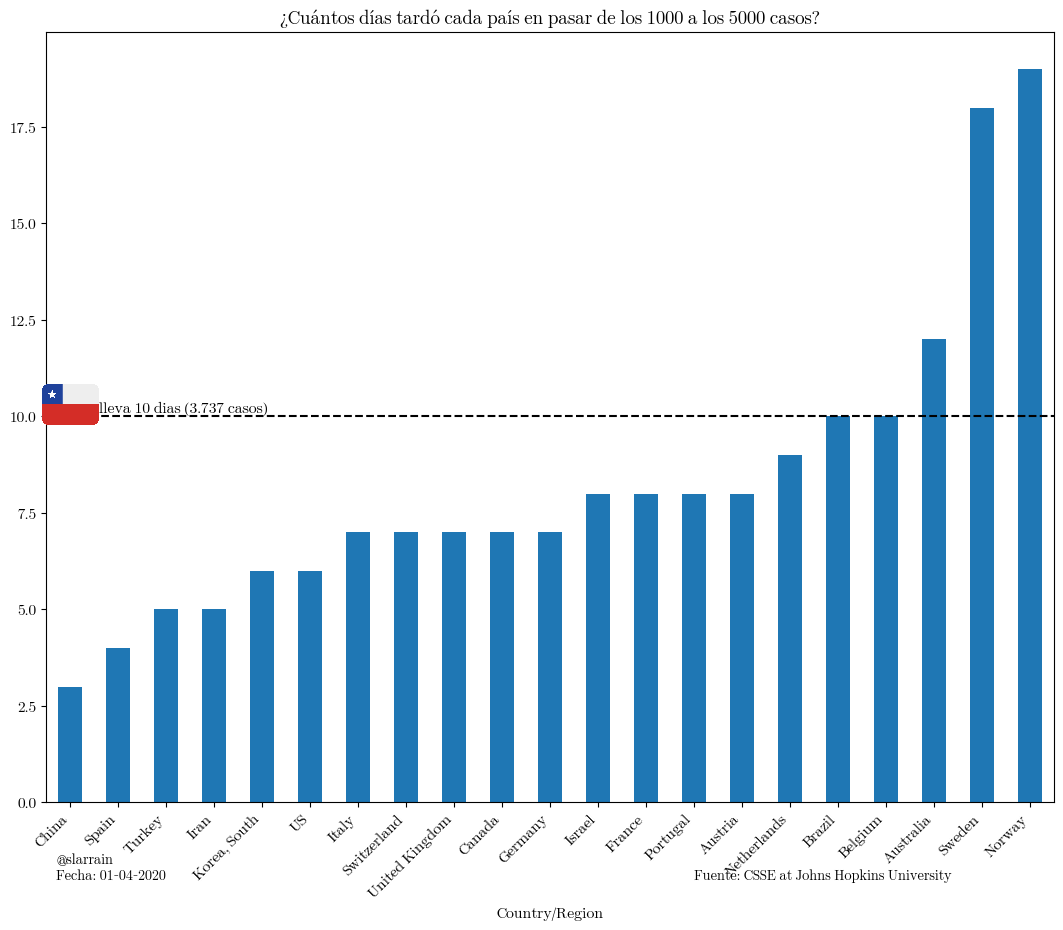

In [231]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().sort_values().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.007))
# ax.get_children()[8].set_color('r')
ax.set_title('¿Cuántos días tardó cada país en pasar de los {} a los {} casos?'.format(casos_min, casos_max))
ax.text(-0.3, -2, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(13, -2, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
ax.text(
    0.6,
    10.1,
    "lleva 10 dias (3.737 casos)", 
#     fontdict={'fontname':'symbola'},
#     fontname='Symbola',
#     xy=('2017-06-18', 1500000), 
#     xytext=(1, 7), 
#     arrowprops=dict(facecolor='gray', shrink=0.05)
)
im = image.imread('/home/santiago/Downloads/chile.png')

imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.08)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (0, 10.3),
    frameon=False)
ax.add_artist(ab)
plt.axhline(y=10, ls='dashed', color='black')
# plt.axvline(x='2017-06-18', ls='dashed', color='black')
# plt.savefig("figs/dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')

In [259]:
## De 1000 a 10000

In [260]:
casos_min = 1000
casos_max = 10000
paises_sobre_x = (df2 > casos_max).sum()
paises_sobre_x_lista = paises_sobre_x[paises_sobre_x > 0].index.tolist()

paises_sobre_x_lista

['Austria',
 'Belgium',
 'China',
 'France',
 'Germany',
 'Iran',
 'Italy',
 'Netherlands',
 'Spain',
 'Switzerland',
 'Turkey',
 'US',
 'United Kingdom']

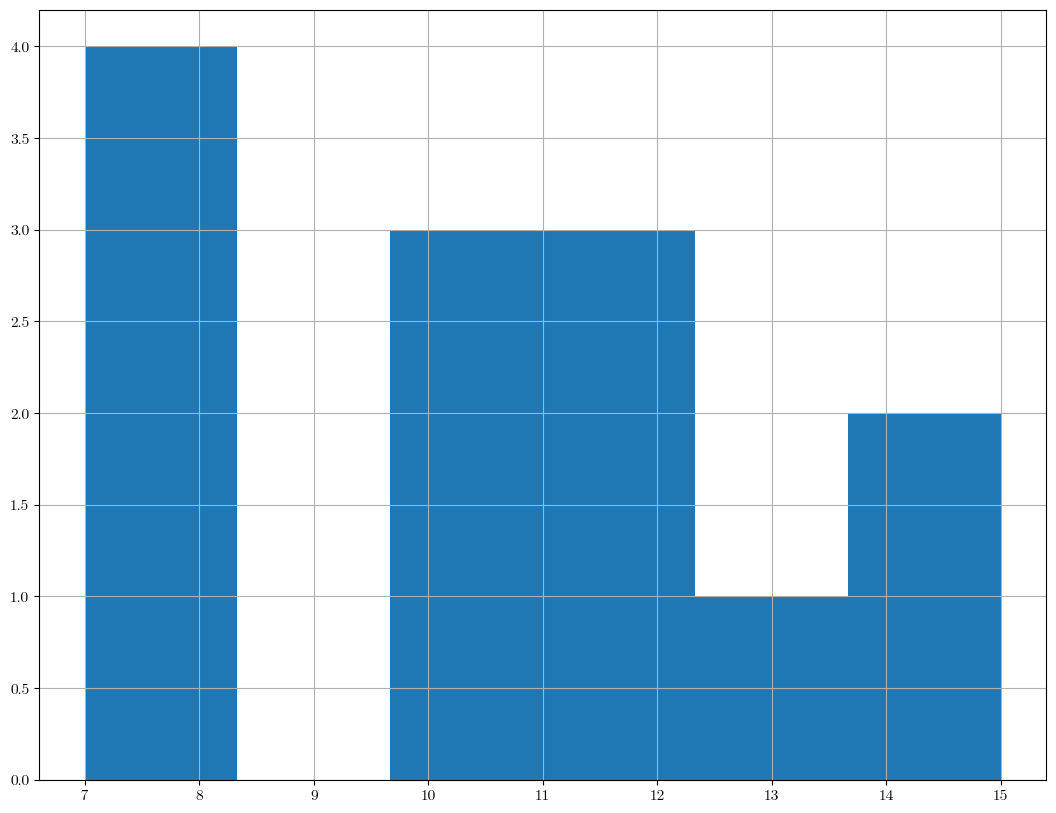

In [261]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().hist(bins=6)

In [262]:
mean = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().mean()
mean

10.615384615384615

In [263]:
((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum()

Country/Region
Austria           15
Belgium           13
China              7
France            11
Germany           10
Iran              10
Italy             10
Netherlands       14
Spain              8
Switzerland       12
Turkey             8
US                 8
United Kingdom    12
dtype: int64

In [264]:
len(((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum())

13

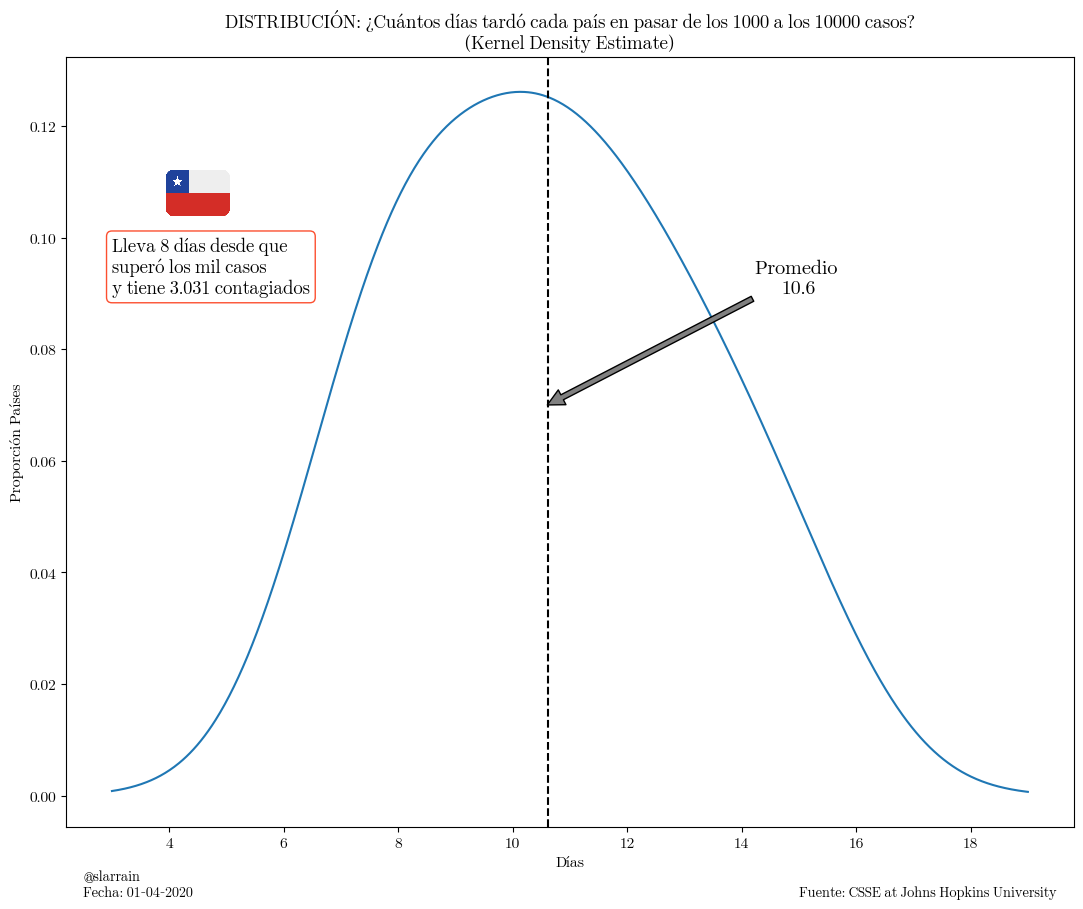

In [284]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().plot.kde()
ax.set(
    title='DISTRIBUCIÓN: ¿Cuántos días tardó cada país en pasar de los {} a los {} casos?\n(Kernel Density Estimate)'.format(casos_min, casos_max),
    xlabel="Días", 
    ylabel="Proporción Países",
)
# plt.suptitle('Distribución')
plt.axvline(x=mean, ls='dashed', color='black')
# plt.axvline(x=7, 
# #             ls=, 
#             color='yellow')


### 100 a 1000
# plt.axvline(x=9, ls='dashed', color='red')
# ax.annotate(
#     "Promedio \n{:.1f}".format(mean), 
#     xy=(
# #         mean-0.01, 0.12  # 1000 a 5000
#         9 - 0.01, 0.07  # 100 a 1000
#        ), 
#     xytext=(
# #         0, 0.15  # 1000 a 5000
#         -10, 0.08  # 100 a 1000
#     ), 
#     fontsize=14,
#     horizontalalignment='center',
#     arrowprops=dict(facecolor='gray', shrink=1)
# )
### 100 a 1000

ax.annotate(
    "Promedio \n{:.1f}".format(mean), 
    xy=(
        mean-0.01, 0.07  # 1000 a 5000
#         mean - 0.01, 0.07  # 100 a 1000
       ), 
    xytext=(
        15, 0.09  # 1000 a 5000
#         30, 0.08  # 100 a 1000
    ), 
    fontsize=14,
    horizontalalignment='center',
    arrowprops=dict(facecolor='gray', shrink=1)
)

texto = """Lleva 8 días desde que 
superó los mil casos
y tiene 3.031 contagiados"""
ax.text(
    3,
    0.09,
    texto, 
    fontweight='bold',
    fontsize=13,
    bbox=dict(facecolor='none', edgecolor='#fc4f30', boxstyle='round')
)


imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.09)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (4.5, 0.108),
    frameon=False)
ax.add_artist(ab)

ax.text(2.5, -0.018, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(15, -0.018, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
plt.savefig("figs/DISTRIBUCION_dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')


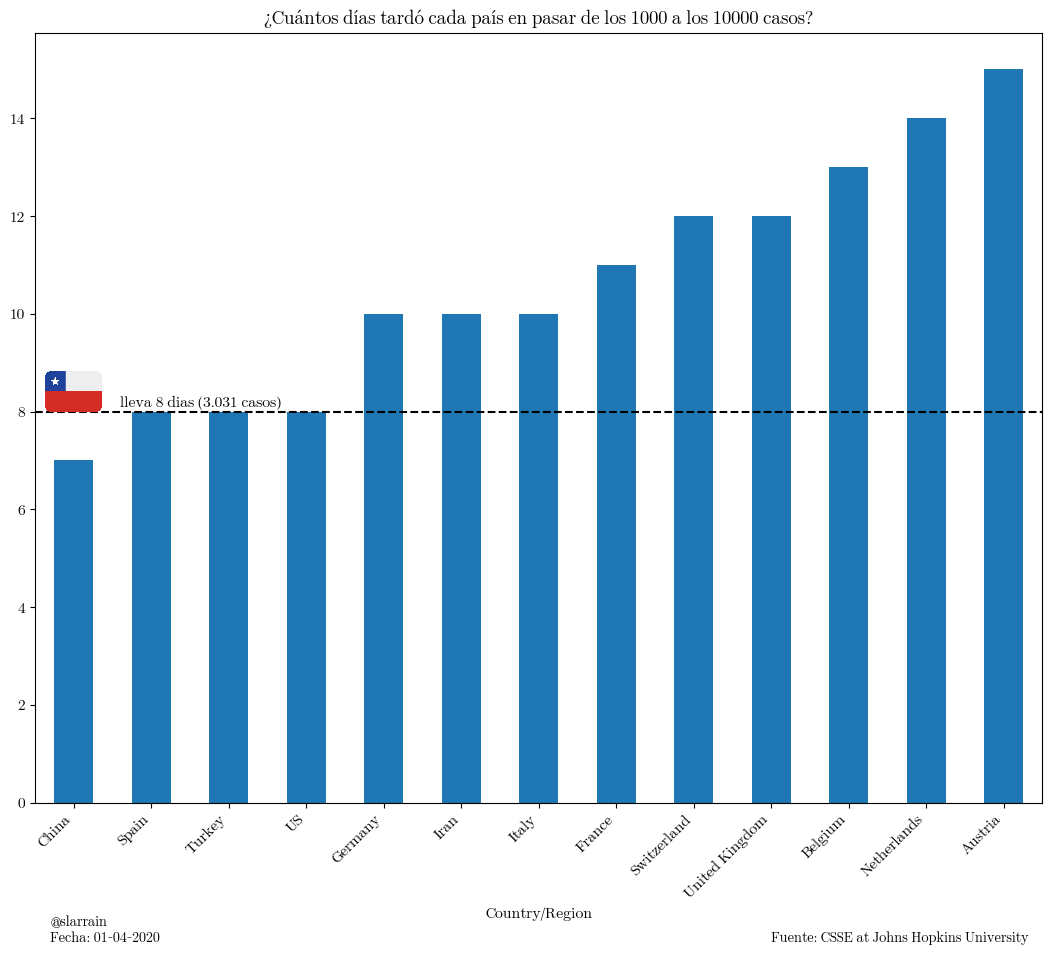

In [288]:
ax = ((df2[paises_sobre_x_lista] >= casos_min) & (df2[paises_sobre_x_lista] <= casos_max)).sum().sort_values().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.007))
# ax.get_children()[8].set_color('r')
ax.set_title('¿Cuántos días tardó cada país en pasar de los {} a los {} casos?'.format(casos_min, casos_max))
ax.text(-0.3, -2.85, "@slarrain\nFecha: 01-04-2020", 
#         color='grey', 
#         fontweight='bold'
        fontsize=10
       )
ax.text(9, -2.85, "Fuente: CSSE at Johns Hopkins University", 
#         color='grey'
        fontsize=10
       )
ax.text(
    0.6,
    8.1,
    "lleva 8 dias (3.031 casos)", 
#     fontdict={'fontname':'symbola'},
#     fontname='Symbola',
#     xy=('2017-06-18', 1500000), 
#     xytext=(1, 7), 
#     arrowprops=dict(facecolor='gray', shrink=0.05)
)
im = image.imread('/home/santiago/Downloads/chile.png')

imagebox = OffsetImage(image.imread('/home/santiago/Downloads/chile.png'), zoom=0.08)
imagebox.image.axes = ax

ab = AnnotationBbox(
    imagebox, 
    (0, 8.4),
    frameon=False)
ax.add_artist(ab)
plt.axhline(y=8, ls='dashed', color='black')
# plt.axvline(x='2017-06-18', ls='dashed', color='black')
plt.savefig("figs/dias_para_{}_a_{}_casos_pais.png".format(casos_min, casos_max), bbox_inches='tight')

In [1]:
## FIN

In [ ]:
    dias = 100
    dfc = df2[df2 > dias][paises_sobre_x_lista]
    dfgf = dfc.diff().div(dfc.diff().shift(1))
    dfgf

In [52]:
def look(country='Chile', df2=df2, dias=100, tail=30, th=1.10):
    total = df2[df2 > dias][country].tail(tail).rename('Total')
    nuevos = df2[df2 > dias][country].diff().tail(tail).rename('Nuevos')
    gf_diario = nuevos.div(nuevos.shift(1)).rename('GF Diario')
    gf_semanal = gf_diario.rolling(7).mean().rename("GF Semanal")
    bajo_th = (gf_semanal < th).rename('Bajo TH')
    return pd.concat(
    [
        total,
        nuevos,
        gf_diario,
        gf_semanal,
        bajo_th
        
    ], axis=1)
look('Chile', tail=14)

,Total,Nuevos,GF Diario,GF Semanal,Bajo TH
2020-03-19 00:00:00,342.0,104.0,NaN,NaN,False
2020-03-20 00:00:00,434.0,92.0,0.884615,NaN,False
2020-03-21 00:00:00,537.0,103.0,1.119565,NaN,False
2020-03-22 00:00:00,632.0,95.0,0.922330,NaN,False
2020-03-23 00:00:00,746.0,114.0,1.200000,NaN,False
2020-03-24 00:00:00,922.0,176.0,1.543860,NaN,False
2020-03-25 00:00:00,1142.0,220.0,1.250000,NaN,False
2020-03-26 00:00:00,1306.0,164.0,0.745455,1.095118,True
2020-03-27 00:00:00,1610.0,304.0,1.853659,1.233553,False
2020-03-28 00:00:00,1909.0,299.0,0.983553,1.214122,False


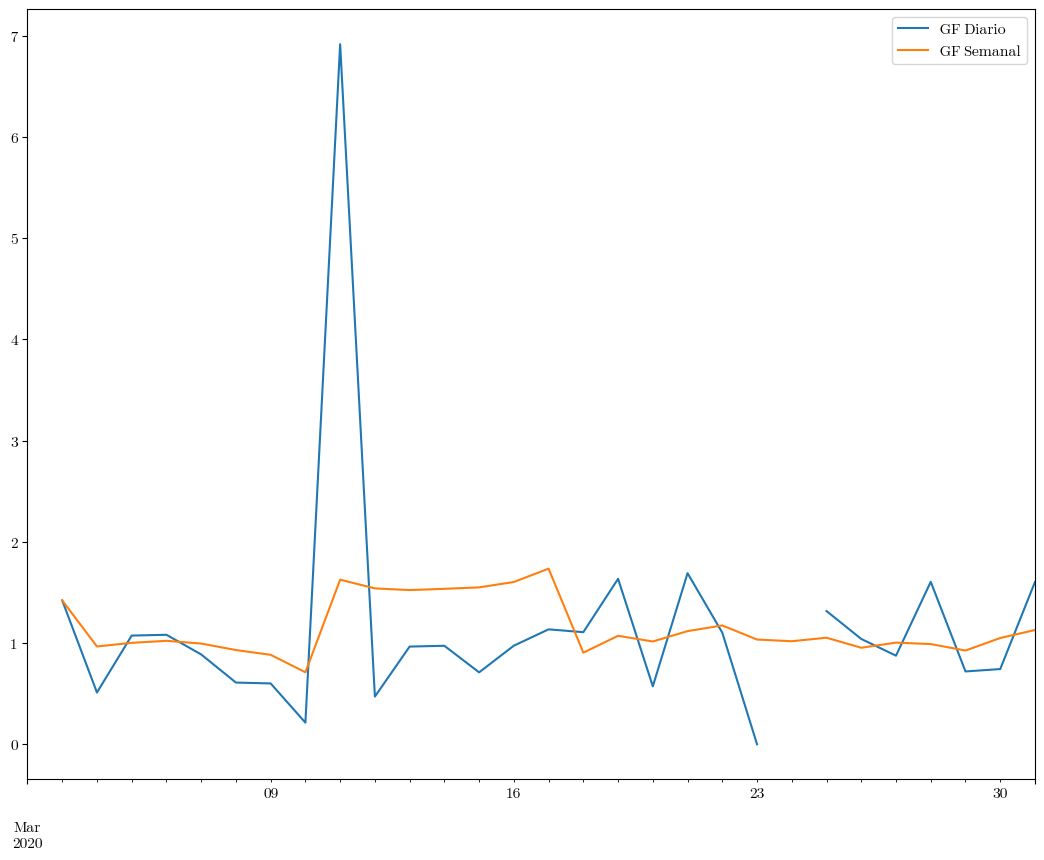

In [25]:
look('Korea, South', tail=30)[['GF Diario', 'GF Semanal']].plot()

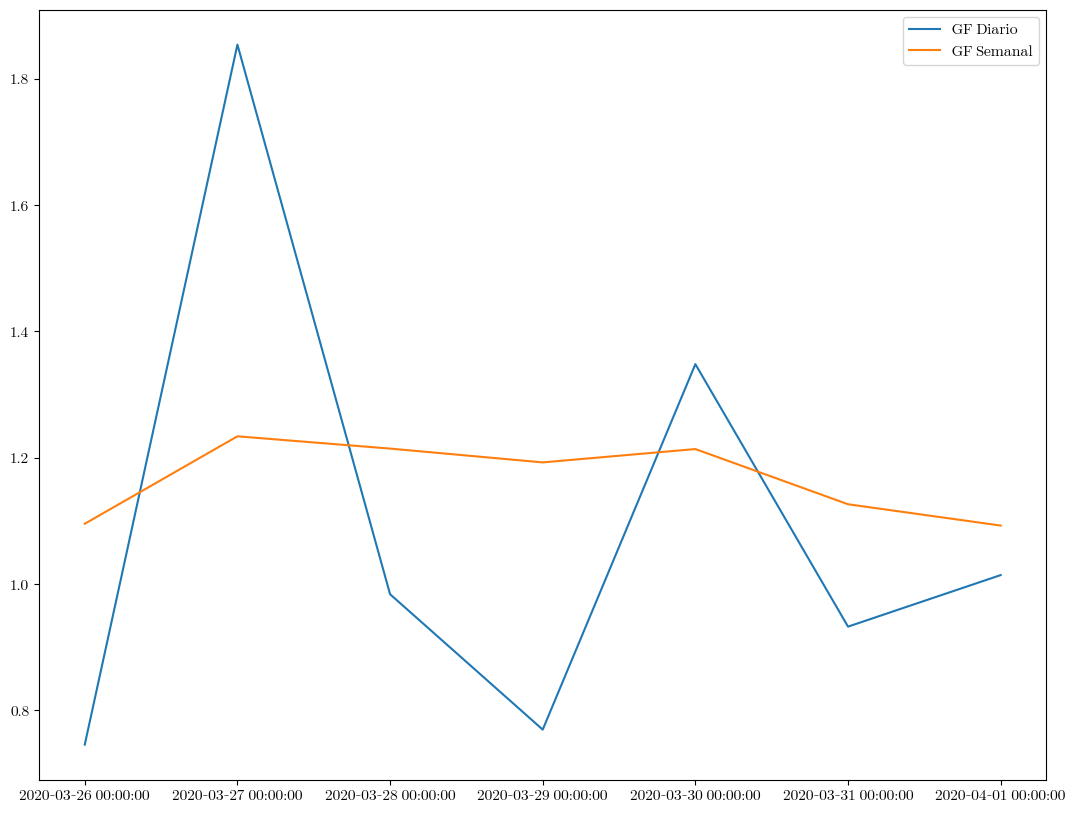

In [57]:
chile = look('Chile', tail=14).dropna()
chile[['GF Diario', 'GF Semanal']].plot()

In [72]:
chile['date_ordinal'] = pd.to_datetime(chile.index.to_series()).apply(lambda date: date.toordinal())

(0, 2.2335525779487715)

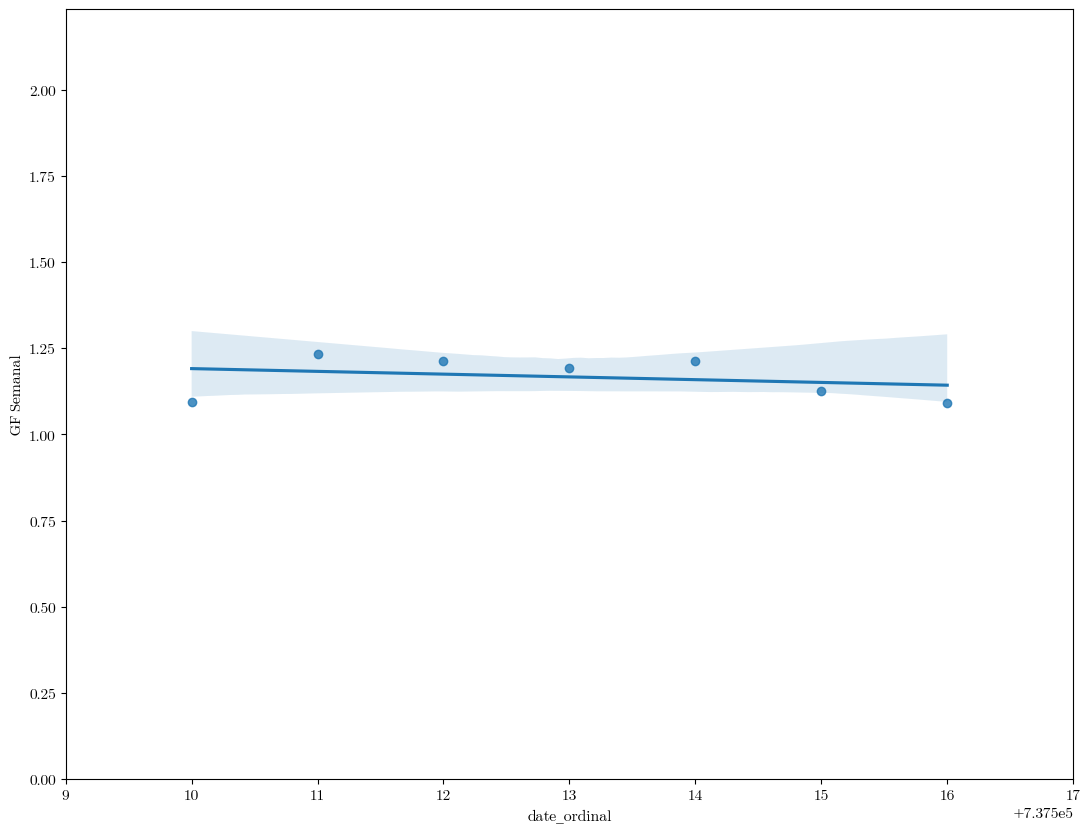

In [75]:
ax = sns.regplot(
    data=chile,
    x='date_ordinal',
    y='GF Semanal',
)
# Tighten up the axes for prettiness
ax.set_xlim(chile['date_ordinal'].min() - 1, chile['date_ordinal'].max() + 1)
ax.set_ylim(0, chile['GF Semanal'].max() + 1)

In [76]:
ax.set_xlabel(chile.index)
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(chile.index, chile['GF Semanal'])

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [73]:
chile

,Total,Nuevos,GF Diario,GF Semanal,Bajo TH,date_ordinal
2020-03-26 00:00:00,1306.0,164.0,0.745455,1.095118,True,737510
2020-03-27 00:00:00,1610.0,304.0,1.853659,1.233553,False,737511
2020-03-28 00:00:00,1909.0,299.0,0.983553,1.214122,False,737512
2020-03-29 00:00:00,2139.0,230.0,0.769231,1.192251,False,737513
2020-03-30 00:00:00,2449.0,310.0,1.347826,1.213369,False,737514
2020-03-31 00:00:00,2738.0,289.0,0.932258,1.125997,False,737515
2020-04-01 00:00:00,3031.0,293.0,1.013841,1.092260,True,737516


In [45]:
df2['Chile'].tail(30).rolling(2).sum()

2020-03-05 00:00:00       NaN
2020-03-06 00:00:00       8.0
2020-03-07 00:00:00       8.0
2020-03-08 00:00:00      12.0
2020-03-09 00:00:00      16.0
2020-03-10 00:00:00      21.0
2020-03-11 00:00:00      36.0
2020-03-12 00:00:00      46.0
2020-03-13 00:00:00      66.0
2020-03-14 00:00:00     104.0
2020-03-15 00:00:00     135.0
2020-03-16 00:00:00     229.0
2020-03-17 00:00:00     356.0
2020-03-18 00:00:00     439.0
2020-03-19 00:00:00     580.0
2020-03-20 00:00:00     776.0
2020-03-21 00:00:00     971.0
2020-03-22 00:00:00    1169.0
2020-03-23 00:00:00    1378.0
2020-03-24 00:00:00    1668.0
2020-03-25 00:00:00    2064.0
2020-03-26 00:00:00    2448.0
2020-03-27 00:00:00    2916.0
2020-03-28 00:00:00    3519.0
2020-03-29 00:00:00    4048.0
2020-03-30 00:00:00    4588.0
2020-03-31 00:00:00    5187.0
2020-04-01             5769.0
2020-03-19             3373.0
2020-04-01 00:00:00    3373.0
Name: Chile, dtype: float64

In [47]:
df2.loc['2020-03-19 00:00:00', 'Chile'] = 342
df2.loc['2020-04-01 00:00:00', 'Chile'] = 3031

In [55]:
df2['Chile'].tail(30)

2020-03-03 00:00:00       1.0
2020-03-04 00:00:00       1.0
2020-03-05 00:00:00       4.0
2020-03-06 00:00:00       4.0
2020-03-07 00:00:00       4.0
2020-03-08 00:00:00       8.0
2020-03-09 00:00:00       8.0
2020-03-10 00:00:00      13.0
2020-03-11 00:00:00      23.0
2020-03-12 00:00:00      23.0
2020-03-13 00:00:00      43.0
2020-03-14 00:00:00      61.0
2020-03-15 00:00:00      74.0
2020-03-16 00:00:00     155.0
2020-03-17 00:00:00     201.0
2020-03-18 00:00:00     238.0
2020-03-19 00:00:00     342.0
2020-03-20 00:00:00     434.0
2020-03-21 00:00:00     537.0
2020-03-22 00:00:00     632.0
2020-03-23 00:00:00     746.0
2020-03-24 00:00:00     922.0
2020-03-25 00:00:00    1142.0
2020-03-26 00:00:00    1306.0
2020-03-27 00:00:00    1610.0
2020-03-28 00:00:00    1909.0
2020-03-29 00:00:00    2139.0
2020-03-30 00:00:00    2449.0
2020-03-31 00:00:00    2738.0
2020-04-01 00:00:00    3031.0
Name: Chile, dtype: float64

In [170]:
sample_df = pd.DataFrame({
	'Nombre': ['diadelamujer_12', 'marcharechazo_20200307_1']*3,
	'Query': ['"8M2Millones" pacos OR gobierno OR GobiernodeChile OR carabineros',
		'carabineros violentistas OR fascistas OR fachos since:2020-03-07']*3,
	'Tema': ['Feminismo', 'Rechazo']*3,
	'Tags': [['Represión', 'Violencia', 'Carabineros'], ['Carabineros', 'Fascismo']]*3,
	'Fecha de Creación': ["2020-03-09 12:49:16", "2020-03-08 0:16:08"]*3,
	'Fecha de Actualización': ["2020-03-09 12:49:16", "2020-03-08 18:50:03"]*3,
	'Activa': [True, False, False, False, True, False]
})

In [65]:
print('🇨🇱'.encode('utf8'))

b'\xf0\x9f\x87\xa8\xf0\x9f\x87\xb1'


In [173]:
[[cell for cell in row] for _, row in sample_df[['Nombre', 'Query', 'Tema']].iterrows()]

[['diadelamujer_12',
  '"8M2Millones" pacos OR gobierno OR GobiernodeChile OR carabineros',
  'Feminismo'],
 ['marcharechazo_20200307_1',
  'carabineros violentistas OR fascistas OR fachos since:2020-03-07',
  'Rechazo'],
 ['diadelamujer_12',
  '"8M2Millones" pacos OR gobierno OR GobiernodeChile OR carabineros',
  'Feminismo'],
 ['marcharechazo_20200307_1',
  'carabineros violentistas OR fascistas OR fachos since:2020-03-07',
  'Rechazo'],
 ['diadelamujer_12',
  '"8M2Millones" pacos OR gobierno OR GobiernodeChile OR carabineros',
  'Feminismo'],
 ['marcharechazo_20200307_1',
  'carabineros violentistas OR fascistas OR fachos since:2020-03-07',
  'Rechazo']]

In [176]:
for _, row in sample_df[['Nombre', 'Query', 'Tema']].iterrows():
    continue

In [177]:
row

Nombre                             marcharechazo_20200307_1
Query     carabineros violentistas OR fascistas OR facho...
Tema                                                Rechazo
Name: 5, dtype: object

In [178]:
for cell in row:
    continue
cell

'Rechazo'

In [179]:
import re
import json
from urllib.parse import quote
from urllib.request import urlopen, Request

def get_contents(l):
    url = "http://en.wikipedia.org/w/api.php?action=query&prop=revisions&format=json&rvprop=content&redirects=&titles="
    url += "|".join(quote(i) for i in l)

    data = json.loads(urlopen(url).read().decode('utf-8'))

    normalized = {i: i for i in l}
    if "normalized" in data["query"]:
        normalized.update({n["from"]: n["to"] for n in data["query"]["normalized"]})
    redirects = {i: i for i in normalized.values()}
    if "redirects" in data["query"]:
        redirects.update({r["from"]: r["to"] for r in data["query"]["redirects"]})
    contents = {p["title"]: p["revisions"][0]["*"] for p in data["query"]["pages"].values()}

    return {i: contents[redirects[normalized[i]]] for i in l}


def get_flag_pages(l):
    d = get_contents(["Template:Country data %s" % i for i in l])

    result = dict()
    for k, v in d.items():
        result[k[22:]] = re.findall("\|[ \t\r\n]*flag alias[ \t\r\n]*=[ \t\r\n]*(.*?)[ \t\r\n]*\|", v)[0]

    return result


def get_download_urls(l):
    url = "http://en.wikipedia.org/w/api.php?action=query&prop=imageinfo&format=json&iiprop=url&iilimit=1&titles="
    url += "|".join(quote(i) for i in l)

    data = json.loads(urlopen(url).read().decode('utf-8'))

    normalized = {i: i for i in l}
    if "normalized" in data["query"]:
        normalized.update({n["from"]: n["to"] for n in data["query"]["normalized"]})
    redirects = {i: i for i in normalized.values()}
    if "redirects" in data["query"]:
        redirects.update({r["from"]: r["to"] for r in data["query"]["redirects"]})
    contents = {p["title"]: p["imageinfo"][0]["url"] for p in data["query"]["pages"].values()}

    return {i: contents[redirects[normalized[i]]] for i in l}


def do(l):
    d = get_flag_pages(l)
    urls = get_download_urls(["File:%s" % i for i in d.values()])

    for k, v in {k: urls["File:%s" % v] for k, v in d.items()}.items():
        s = urlopen(Request(v, headers={'User-agent': 'Mozilla/5.0'})).read()
        name = "%s%s" % (k, v[v.rindex('.'):])
        open(name, "wb").write(s)

In [194]:
do('China')

KeyError: 'revisions'

In [186]:
print ("🇳🇬".encode())

b'\xf0\x9f\x87\xb3\xf0\x9f\x87\xac'


In [189]:
print ('U+1F1F3 U+1F1EC'.decode())

AttributeError: 'str' object has no attribute 'decode'

In [191]:
    l = 'China'
    url = "http://en.wikipedia.org/w/api.php?action=query&prop=revisions&format=json&rvprop=content&redirects=&titles="
    url += "|".join(quote(i) for i in l)

    data = json.loads(urlopen(url).read().decode('utf-8'))

    normalized = {i: i for i in l}
    if "normalized" in data["query"]:
        normalized.update({n["from"]: n["to"] for n in data["query"]["normalized"]})
    redirects = {i: i for i in normalized.values()}
    if "redirects" in data["query"]:
        redirects.update({r["from"]: r["to"] for r in data["query"]["redirects"]})

In [192]:
contents = {p["title"]: p["revisions"][0]["*"] for p in data["query"]["pages"].values()}

In [193]:
contents

{'A': '{{short description|First letter of the Latin alphabet}}\n{{about|the Roman letter|the article in English|A (word)|other uses}}\n{{Technical reasons|A#|A-sharp|A-sharp (disambiguation)}}\n{{pp-move-indef}}\n{{pp-semi-indef}}\n{{Use dmy dates|date=November 2019}}\n{{Infobox grapheme\n|name=A\n|letter=A a\n|variations=([[A#Related characters|See below]])\n|image=File:A cursiva.gif\n|imagesize=200px\n|imagealt=Writing cursive forms of A\n|script=[[Latin script]]\n|type=[[Alphabet]]\n|typedesc=ic and [[Logographic]]\n|language=[[Latin language]]\n|phonemes=[{{IPAlink|a}}]<br>[{{IPAlink|ɑ}}]<br>[{{IPAlink|ɒ}}]<br>[{{IPAlink|æ}}]<br>[{{IPAlink|ə}}]<br>[{{IPAlink|ɛ}}]<br>[{{IPAlink|oː}}]<br>[{{IPAlink|ɔ}}]<br>[{{IPAlink|e}}]<br>[{{IPAlink|ʕ}}]<br>[{{IPAlink|ʌ}}]<br>{{IPAc-en|eɪ}}\n|unicode=U+0041, U+0061\n|alphanumber=1\n|number=1\n|fam1=<hiero>F1</hiero>\n|fam2=[[File:Proto-semiticA-01.svg|20px|Proto-Sinaitic \'alp]]\n|fam3=[[File:Cretan-1.jpg|20px|Early Crete version of the letter "A

In [198]:
chile = growth_factor_over_100(df2)
chile.tail(15)

Chile 100


2020-03-11         NaN
2020-03-12         NaN
2020-03-13         NaN
2020-03-14         NaN
2020-03-15         NaN
2020-03-16         NaN
2020-03-17         NaN
2020-03-18    0.804348
2020-03-19    0.000000
2020-03-20         inf
2020-03-21    0.525510
2020-03-22    0.922330
2020-03-23    1.200000
2020-03-24    1.543860
2020-03-25    1.250000
Name: Chile, dtype: float64

In [200]:
italia = growth_factor_over_100(df2, 'Italy')
italia

Italy 100


2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
                ...   
2020-03-21    1.095389
2020-03-22    0.847949
2020-03-23    0.861331
2020-03-24    1.096053
2020-03-25    0.992570
Name: Italy, Length: 64, dtype: float64

In [205]:
italia.tail(10).mean()

1.0467413696955643

In [6]:
import tabula

In [7]:
url = 'https://www.minsal.cl/wp-content/uploads/2020/03/INFORME_EPI_COVID19_20200330.pdf'
url = '/home/santiago/Downloads/INFORME_EPI_COVID19_20200330.pdf'
url2 = 'data/01.04.2020-final.pdf'

In [81]:
tables = tabula.read_pdf(url, pages = "all", multiple_tables = True)

Got stderr: Apr 01, 2020 6:12:17 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Apr 01, 2020 6:12:17 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Apr 01, 2020 6:12:19 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Apr 01, 2020 6:12:29 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Apr 01, 2020 6:12:29 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Apr 01, 2020 6:12:30 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [82]:
tables

[                                            ontenido
 0  RESUMEN .........................................
 1  MÉTODO ..........................................
 2  CASOS CONFIRMADOS POR LABORATORIO EN CHILE ......
 3  CARACTERISTICAS EPIDEMIOLÓGICAS .................
 4  ANALISIS REGIONAL ...............................,      •  \
 0  NaN   
 1    •   
 2    •   
 
   Investigación epidemiológica realizada por las unidades de Epidemiología de las Secretarias  
 0  Regionales Ministeriales (SEREMI) de Salud del...                                           
 1  Registro de estadísticas vitales del Registro ...                                           
 2  Base de datos de la unidad de gestión de cama ...                                           ,             Unnamed: 0 Unnamed: 1                 N° casos         Unnamed: 2
 0               Región  Población                      NaN  Tasa incidencia &
 1                  NaN        NaN  Notificados Confirmados                NaN
 2   

In [83]:
len(tables)

23

In [103]:
a = tables[10]
a.info()
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Comuna      16 non-null     object 
 1   N°          0 non-null      float64
 2   Unnamed: 0  16 non-null     object 
 3   Población   16 non-null     int64  
 4   Tasa        0 non-null      float64
 5   Unnamed: 1  16 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 896.0+ bytes


,Comuna,N°,Unnamed: 0,Población,Tasa,Unnamed: 1
0,Andacollo,NaN,-,11791,NaN,"0,0"
1,Canela,NaN,-,9546,NaN,"0,0"
2,Combarbalá,NaN,-,13884,NaN,"0,0"
3,Coquimbo,NaN,17,256735,NaN,"6,6"
4,Illapel,NaN,-,32801,NaN,"0,0"
5,La Higuera,NaN,-,4450,NaN,"0,0"
6,La Serena,NaN,-,249656,NaN,"0,8"
7,Los Vilos,NaN,-,23374,NaN,"4,3"
8,Monte Patria,NaN,-,32527,NaN,"0,0"
9,Ovalle,NaN,4,121269,NaN,"3,3"


In [33]:
def calc(x):
    return int(x['Poblacion']*x['Tasa']/100000 if x['N'] == 0 else x['N'])

def clean_table(df):
    df = df.iloc[:-1]
    

    
    if 'Comuna' in df.columns and 'Tasa' in df.columns:
        df = df.drop(['Tasa', 'N°'], axis=1)
        if len(df.columns) == 5:
            
            #Special annoying case
            if any(df.Comuna.isin(['Primavera'])):
                df = df.drop(['Unnamed: 1'], axis=1)
                df = df.rename(
                    columns={
                        'Unnamed: 0': 'N', 
                        'Población': 'Poblacion',
                        'Unnamed: 2': 'Tasa'
                    }
                )
            else:
                df = df.drop(['Comuna'], axis=1)
                df = df.rename(
                    columns={
                        'Unnamed: 2': 'Tasa', 
                        'Unnamed: 0': 'Comuna', 
                        'Población': 'Poblacion',
                        'Unnamed: 1': 'N'
                    }
                )
        else:
            df = df.rename(columns={'Unnamed: 1': 'Tasa', 'Unnamed: 0': 'N', 'Población': 'Poblacion'})
    elif 'Tabla 10 (continuación)' in df.columns:
        df = df.iloc[2:]
        df = df.rename(
            columns= {
                'Tabla 10 (continuación)': 'Comuna',
                'Unnamed: 0': 'N',
                'Unnamed: 2': 'Poblacion',
                'Unnamed: 4': 'Tasa'
            }
        )
        df = df.drop(['Unnamed: 1','Unnamed: 3'], axis=1)
    else:
        return
#     df = df[~(df.Comuna == 'Por determinar')]
    df.Poblacion = df.Poblacion.astype(int)
    df.N = df.N.str.replace('-','0')
    df.N = df.N.astype(int)
    df.Tasa = df.Tasa.str.replace(',','.')
    df.Tasa = df.Tasa.astype(float)
    df.N = df.apply(calc, axis=1)
    
    return df
    

In [30]:
rv = []
for i, x in enumerate(tables):
    print (i, x.info())
    rv.append(clean_table(x))

NameError: name 'tables' is not defined

In [268]:
pd.concat(rv)

,Comuna,N,Poblacion,Tasa
0,Arica,6,247552,2.4
1,Camarones,0,1233,0.0
2,General Lagos,0,810,0.0
3,Putre,0,2515,0.0
0,Alto Hospicio,0,129999,0.0
...,...,...,...,...
6,Punta Arenas,29,141984,20.4
7,Río Verde,0,211,0.0
8,San Gregorio,0,681,0.0
9,Timaukel,0,282,0.0


In [8]:
tables2 = tabula.read_pdf(url2, pages = "all", multiple_tables = True)

Got stderr: Apr 03, 2020 1:10:15 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
Apr 03, 2020 1:10:16 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
Apr 03, 2020 1:10:16 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
Apr 03, 2020 1:10:18 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
Apr 03, 2020 1:10:18 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
Apr 03, 2020 1:10:19 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType

In [34]:
rv = []
for i, x in enumerate(tables2):
    print (i, x.info())
    rv.append(clean_table(x))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1 non-null      int64  
 1   Unnamed: 1  1 non-null      int64  
 2   92          0 non-null      float64
 3   Unnamed: 2  1 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 160.0 bytes
0 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   18 non-null     object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   N° casos     18 non-null     object 
 5   Unnamed: 4   0 non-null      float64
 6   Unnamed: 5   0 non-null      float64
 7   Unnamed: 6   18 non-null     object 
 8   Unnamed: 7   0 non-null      float64
 9   Unnamed: 8   0 non-nul

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [32]:
pd.concat(rv)

,Comuna,N,Poblacion,Tasa
0,Arica,6,247552,2.4
1,Camarones,0,1233,0.0
2,General Lagos,0,810,0.0
3,Putre,0,2515,0.0
0,Alto Hospicio,1,129999,0.8
...,...,...,...,...
6,Punta Arenas,87,141984,61.3
7,Río Verde,0,211,0.0
8,San Gregorio,0,681,0.0
9,Timaukel,0,282,0.0


In [20]:
tables2[12]

,Comuna,N°,Unnamed: 0,Población,Tasa,Unnamed: 1
0,Bulnes,NaN,18,22607.0,NaN,"79,6"
1,Chillán,NaN,173,198624.0,NaN,"87,1"
2,Chillán Viejo,NaN,22,33827.0,NaN,"65,0"
3,Cobquecura,NaN,-,5275.0,NaN,"0,0"
4,Coelemu,NaN,-,16845.0,NaN,"5,9"
5,Coihueco,NaN,-,28375.0,NaN,"10,6"
6,El Carmen,NaN,-,12334.0,NaN,"16,2"
7,Ninhue,NaN,-,5414.0,NaN,"0,0"
8,Ñiquén,NaN,-,11567.0,NaN,"0,0"
9,Pemuco,NaN,-,8639.0,NaN,"0,0"


In [120]:
a.apply(lambda row: row['Población']*row['Tasa']/100000)

KeyError: 'Población'

In [121]:
a

,Comuna,N,Población,Tasa
0,Andacollo,0,11791,0.0
1,Canela,0,9546,0.0
2,Combarbalá,0,13884,0.0
3,Coquimbo,17,256735,6.6
4,Illapel,0,32801,0.0
5,La Higuera,0,4450,0.0
6,La Serena,0,249656,0.8
7,Los Vilos,0,23374,4.3
8,Monte Patria,0,32527,0.0
9,Ovalle,4,121269,3.3


In [232]:
## Cuanto llevaban a los 10 dias?

In [238]:
c = ['Australia', 'Sweden', 'Norway']
for p in c:
    print (p, df2[df2 > 1000][p].dropna().iloc[:10].iloc[-1])
# df2[df2 > 1000][c[1]].dropna().iloc[:10].iloc[-1]

Australia 4361.0
Sweden 2286.0
Norway 2621.0


In [2]:
#### Lunes de Deceso

In [6]:
df = pd.read_csv("data/DEF_2010-2017.csv", sep=';', encoding='latin1')
df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (21,43,44,45,46,47,48,49,50,58,60,64,67,69,70,71,73,76,82,86,89,90,91,93,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID_FALLECIDO,DIA_DEF,MES_DEF,ANO_DEF,FECHA_DEF,SEXO,GLOSA_SEXO,DIA_NAC,MES_NAC,ANO_NAC,...,EDAD_PADRE,ACTIV_PADRE,GLOSA_ACTIV_PADRE,OCUPA_PADRE,GLOSA_OCUPA_PADRE,CATEG_PADRE,GLOSA_CATEG_PADRE,CURSO_PADRE,NIVEL_PADRE,GLOSA_NIVEL_PADRE
0,A9257985774071C0575CBAACB23A65438F072426,3.0,1,2010,2010-01-03,1,Hombre,15.0,1.0,1920.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188AC1A50093AE324EE0806350ED74D2A5E63CD1,12.0,4,2010,2010-04-12,1,Hombre,18.0,11.0,1914.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65E5416AE22D2929C07A1C2E64C2B8A04EA5A2C2,24.0,7,2010,2010-07-24,1,Hombre,8.0,1.0,1913.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F250A85BCA03653765FB68CE4593FBFBE07374BF,7.0,8,2010,2010-08-07,2,Mujer,7.0,9.0,1916.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0681E16606A1EB9F91490B4FA47D53EE6C92E955,7.0,6,2010,2010-06-07,1,Hombre,20.0,5.0,1917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])

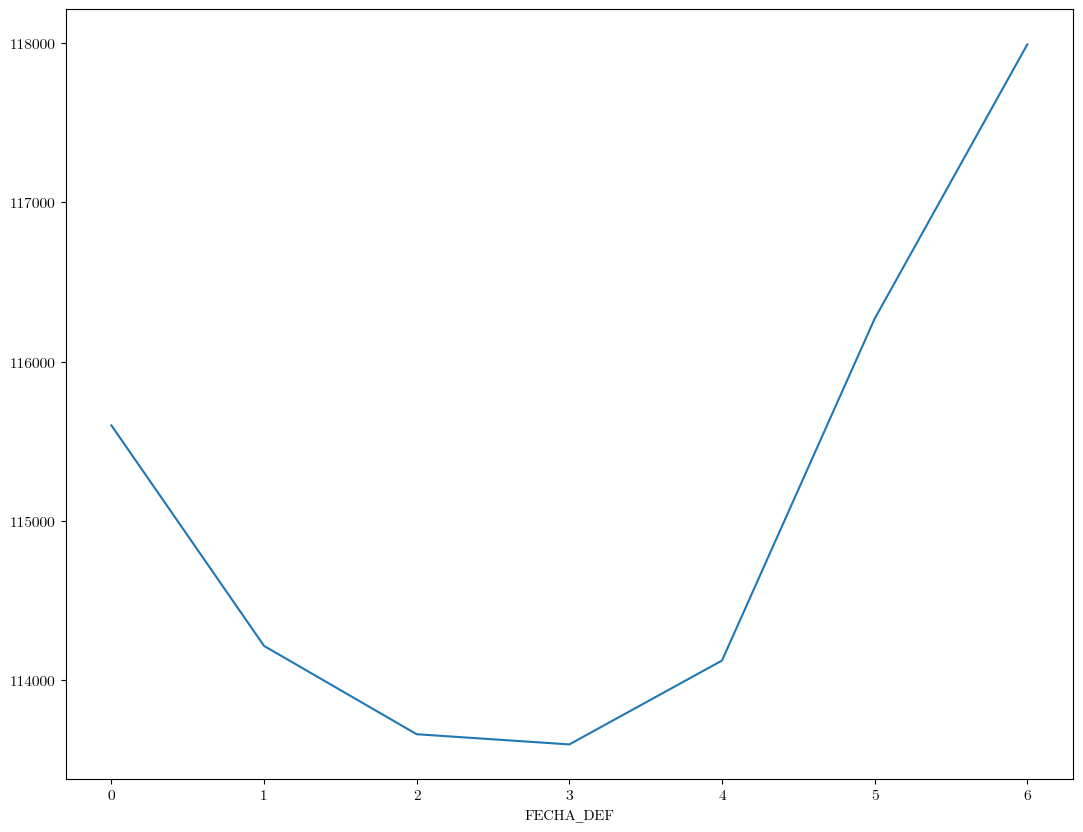

In [12]:
df.groupby(df.FECHA_DEF.dt.dayofweek)['ID_FALLECIDO'].count().plot()

In [14]:
df_dia = df.groupby([pd.Grouper(key="FECHA_DEF", freq='D')])['ID_FALLECIDO'].count()

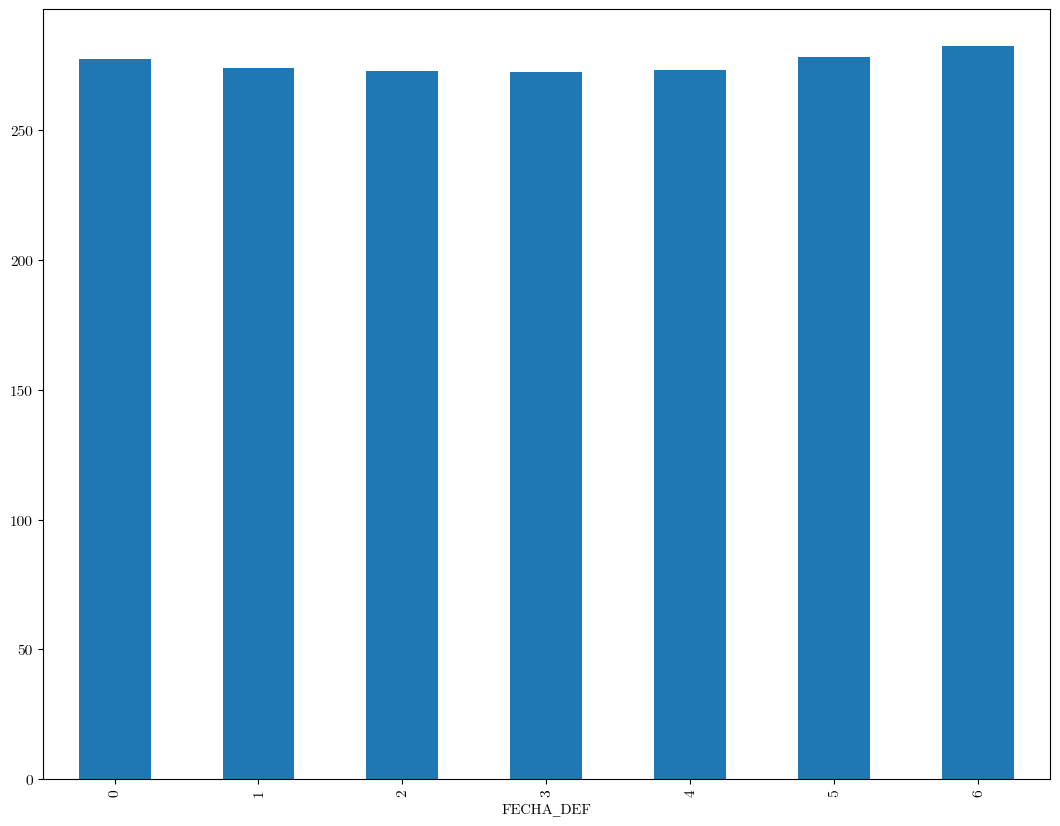

In [22]:
df_dia.groupby(df_dia.index.dayofweek).mean().plot.bar()

In [23]:
df_dia.groupby(df_dia.index.dayofweek).mean()

FECHA_DEF
0    277.215827
1    273.892086
2    272.561151
3    272.407674
4    273.016746
5    278.155502
6    282.279904
Name: ID_FALLECIDO, dtype: float64

In [26]:
df_dia.groupby(df_dia.index.dayofweek).std()

FECHA_DEF
0    32.993829
1    33.927105
2    33.602695
3    34.040865
4    33.924761
5    43.839660
6    32.743251
Name: ID_FALLECIDO, dtype: float64

In [27]:
df_dia.groupby(df_dia.index.dayofweek).count()

FECHA_DEF
0    417
1    417
2    417
3    417
4    418
5    418
6    418
Name: ID_FALLECIDO, dtype: int64

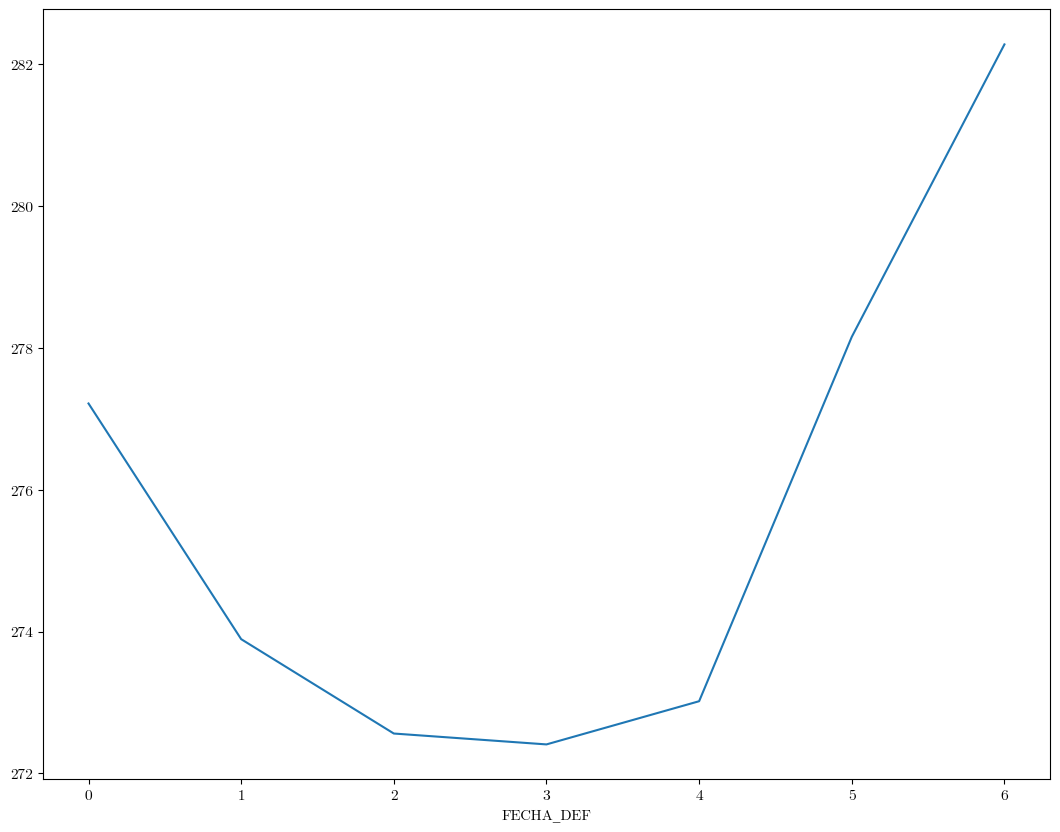

In [24]:
df_dia.groupby(df_dia.index.dayofweek).mean().plot()

In [28]:
from scipy.stats import ttest_ind

In [31]:
ttest_ind(df_dia[df_dia.index.dayofweek == 0], df_dia[df_dia.index.dayofweek == 1])

Ttest_indResult(statistic=1.434187666324543, pvalue=0.15189444470240962)

In [24]:
# Muertos con Min CyT
url = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto37/Defunciones_deis_std.csv"
# url = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario_T.csv"

In [47]:
df = pd.read_csv(url, parse_dates=['Publicacion','Fecha'])
df.Fecha = pd.to_datetime(df.Fecha, errors='coerce')
df.head()

,Serie,Publicacion,Fecha,Numero defunciones
0,confirmados,2020-06-18,2020-03-15,0
1,sospechosos,2020-06-18,2020-03-15,0
2,confirmados,2020-06-28,2020-03-15,0
3,sospechosos,2020-06-28,2020-03-15,0
4,confirmados,2020-07-03,2020-03-15,0


In [48]:
totales = df[df.Serie == 'confirmados'].groupby(df.Publicacion.dt.date)['Numero defunciones'].sum()

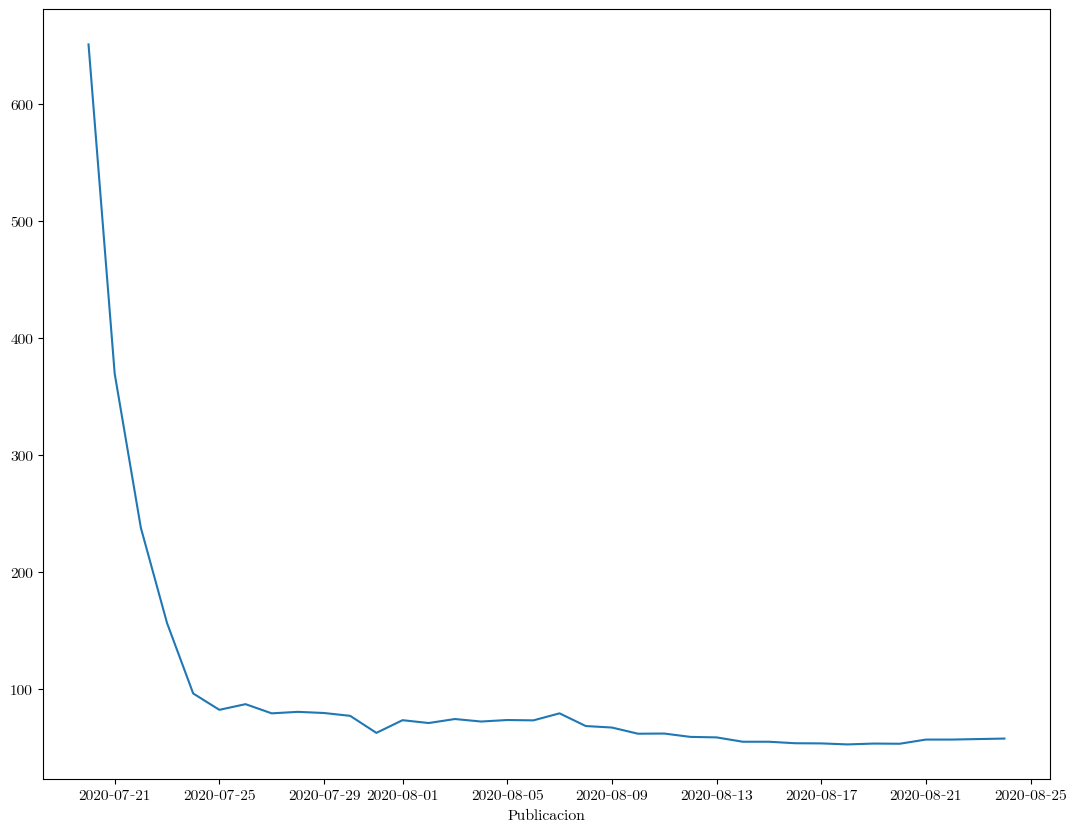

In [49]:
totales.diff().rolling(7).mean().plot()

In [50]:
totales.diff().rolling(7).mean().diff()

Publicacion
2020-06-18           NaN
2020-06-28           NaN
2020-07-03           NaN
2020-07-09           NaN
2020-07-17           NaN
2020-07-18           NaN
2020-07-19           NaN
2020-07-20           NaN
2020-07-21   -281.571429
2020-07-22   -131.857143
2020-07-23    -81.428571
2020-07-24    -60.285714
2020-07-25    -14.000000
2020-07-26      4.857143
2020-07-27     -7.857143
2020-07-28      1.285714
2020-07-29     -1.000000
2020-07-30     -2.428571
2020-07-31    -14.571429
2020-08-01     10.857143
2020-08-02     -2.428571
2020-08-03      3.428571
2020-08-04     -2.142857
2020-08-05      1.285714
2020-08-06     -0.285714
2020-08-07      6.000000
2020-08-08    -10.857143
2020-08-09     -1.285714
2020-08-10     -5.285714
2020-08-11      0.142857
2020-08-12     -2.857143
2020-08-13     -0.428571
2020-08-14     -3.714286
2020-08-15      0.000000
2020-08-16     -1.285714
2020-08-17     -0.142857
2020-08-18     -0.857143
2020-08-19      0.714286
2020-08-20     -0.142857
2020-08-21   

In [36]:
totales

Publicacion
2020-06-18     4074
2020-06-28     6089
2020-07-03     7057
2020-07-09     7743
2020-07-17     8347
2020-07-18     8445
2020-07-19     8503
2020-07-20     8633
2020-07-21     8677
2020-07-22     8722
2020-07-23     8838
2020-07-24     9020
2020-07-25     9020
2020-07-26     9112
2020-07-27     9187
2020-07-28     9240
2020-07-29     9278
2020-07-30     9377
2020-07-31     9457
2020-08-01     9533
2020-08-02     9608
2020-08-03     9707
2020-08-04     9745
2020-08-05     9792
2020-08-06     9889
2020-08-07    10011
2020-08-08    10011
2020-08-09    10077
2020-08-10    10139
2020-08-11    10178
2020-08-12    10205
2020-08-13    10299
2020-08-14    10395
2020-08-15    10395
2020-08-16    10452
2020-08-17    10513
2020-08-18    10546
2020-08-19    10578
2020-08-20    10671
2020-08-21    10792
2020-08-22    10792
2020-08-23    10852
2020-08-24    10916
Name: Numero defunciones, dtype: int64

In [51]:
df.head()

,Serie,Publicacion,Fecha,Numero defunciones
0,confirmados,2020-06-18,2020-03-15,0
1,sospechosos,2020-06-18,2020-03-15,0
2,confirmados,2020-06-28,2020-03-15,0
3,sospechosos,2020-06-28,2020-03-15,0
4,confirmados,2020-07-03,2020-03-15,0


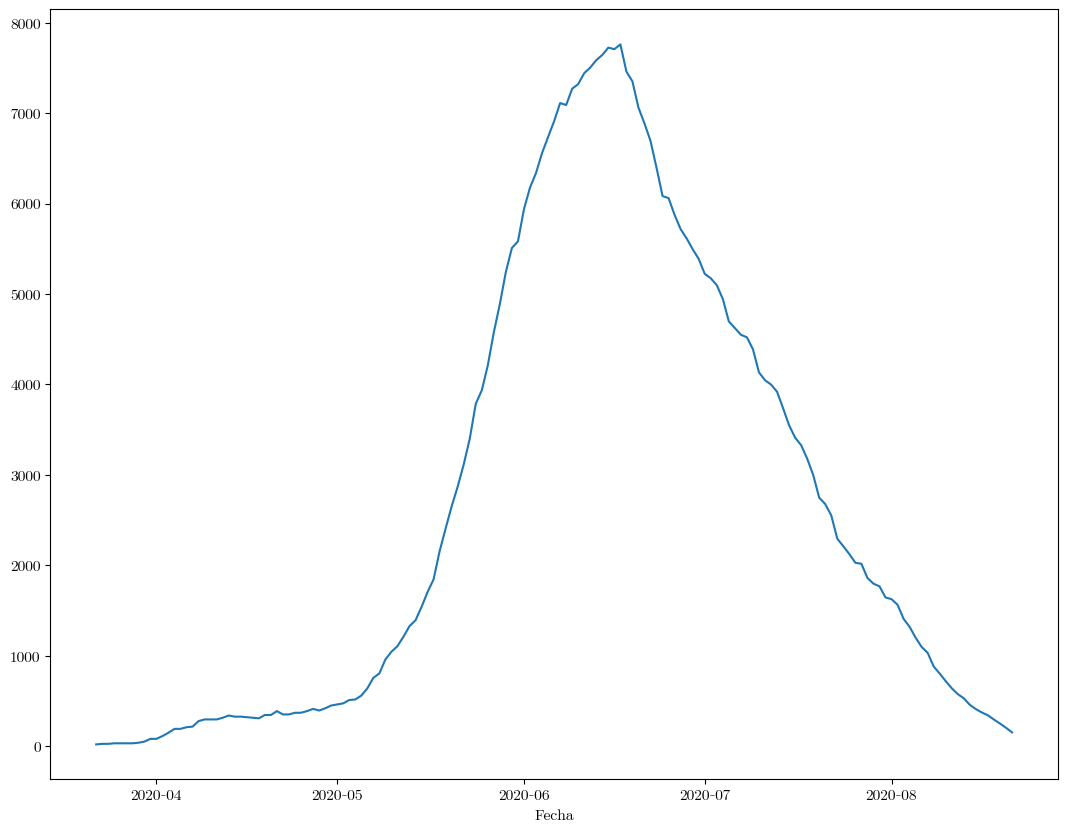

In [55]:
df[df.Serie == 'confirmados'].groupby(df.Fecha.dt.date)['Numero defunciones'].sum().rolling(7).mean().plot()

In [46]:
pd.to_datetime(df.Fecha, errors='coerce').isnull().sum()

54

In [42]:
df.Fecha

0       2020-03-15
1       2020-03-15
2       2020-03-15
3       2020-03-15
4       2020-03-15
           ...    
8635    2020-08-21
8636    2020-08-21
8637    2020-08-21
8638    2020-08-21
8639    2020-08-21
Name: Fecha, Length: 8640, dtype: object

In [57]:
url2 = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv'
df2 = pd.read_csv(url2, parse_dates=['Fecha'])
df2.head()

,Fecha,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar
0,2020-03-02,1.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,2.0,3.0,0.0,0.0,3.0,NaN,2.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,1.0,4.0,0.0,0.0,4.0,NaN,1.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,1.0,5.0,0.0,0.0,5.0,NaN,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [61]:
df2[['Fecha', 'Casos nuevos totales']].plot()

ValueError: view limit minimum -36883.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1300x1000 with 1 Axes>

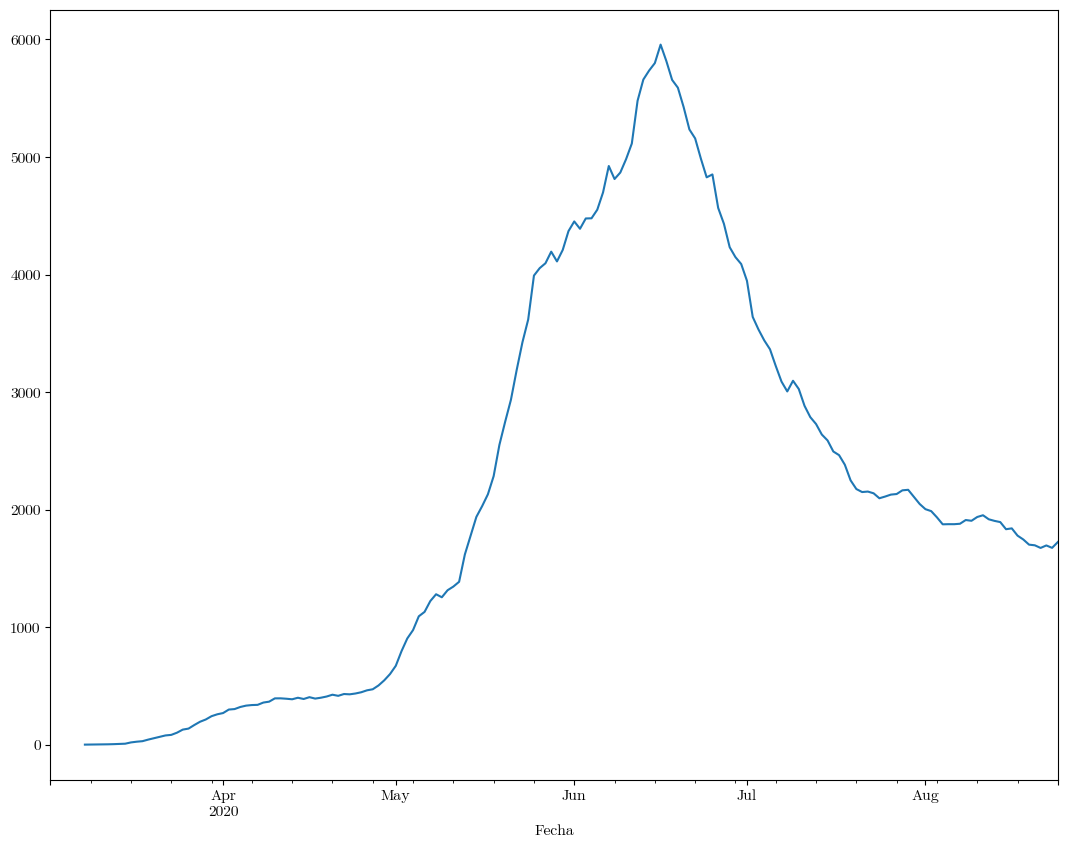

In [75]:
df2.set_index('Fecha')['Casos nuevos totales'].rolling(7).mean().plot()

In [76]:
df3 = df2.set_index('Fecha')['Casos nuevos totales']
df3.head()

Fecha
2020-03-02    1.0
2020-03-03    0.0
2020-03-04    2.0
2020-03-05    1.0
2020-03-06    1.0
Name: Casos nuevos totales, dtype: float64

In [85]:
df3.diff().div(df3.diff().shift(1)).rolling(7).mean().tail(60)

Fecha
2020-06-26   -1.506983
2020-06-27   -1.478032
2020-06-28   -1.686283
2020-06-29   -0.970332
2020-06-30   -0.638068
2020-07-01   -0.495006
2020-07-02    0.454917
2020-07-03   -0.481589
2020-07-04   -0.408375
2020-07-05   -0.211281
2020-07-06    0.930680
2020-07-07    0.605305
2020-07-08    0.535692
2020-07-09    0.122801
2020-07-10    1.099621
2020-07-11    1.648192
2020-07-12    1.576683
2020-07-13    0.064975
2020-07-14    0.224499
2020-07-15    0.146220
2020-07-16   -0.349108
2020-07-17   -0.270746
2020-07-18   -1.104249
2020-07-19   -0.960615
2020-07-20   -0.764071
2020-07-21   -4.768145
2020-07-22   -4.818266
2020-07-23   -2.880411
2020-07-24   -2.909294
2020-07-25   -2.864757
2020-07-26   -2.837941
2020-07-27   -2.710029
2020-07-28    1.577495
2020-07-29    1.662160
2020-07-30    0.360618
2020-07-31    0.464019
2020-08-01    0.558291
2020-08-02    0.407820
2020-08-03   -0.143292
2020-08-04   -0.573779
2020-08-05   -0.782938
2020-08-06   -0.465880
2020-08-07   -0.434899
2020-

In [87]:
df3.div(df3.shift(1)).rolling(1).mean().tail(60)

Fecha
2020-06-26    0.924269
2020-06-27    1.025605
2020-06-28    0.956877
2020-06-29    0.952799
2020-06-30    0.844909
2020-07-01    0.780790
2020-07-02    0.942642
2020-07-03    1.420336
2020-07-04    1.059188
2020-07-05    0.980575
2020-07-06    0.820896
2020-07-07    0.813884
2020-07-08    0.838343
2020-07-09    1.517926
2020-07-10    0.976061
2020-07-11    0.900916
2020-07-12    1.093285
2020-07-13    0.868526
2020-07-14    0.701835
2020-07-15    0.932462
2020-07-16    1.445678
2020-07-17    1.147475
2020-07-18    0.769366
2020-07-19    0.952860
2020-07-20    1.008165
2020-07-21    0.788947
2020-07-22    1.051329
2020-07-23    1.361861
2020-07-24    1.073387
2020-07-25    0.898625
2020-07-26    0.961084
2020-07-27    0.970428
2020-07-28    0.879512
2020-07-29    0.945096
2020-07-30    1.098703
2020-07-31    1.089836
2020-08-01    0.932171
2020-08-02    1.051541
2020-08-03    0.846708
2020-08-04    0.829739
2020-08-05    1.218194
2020-08-06    1.093206
2020-08-07    1.103749
2020-

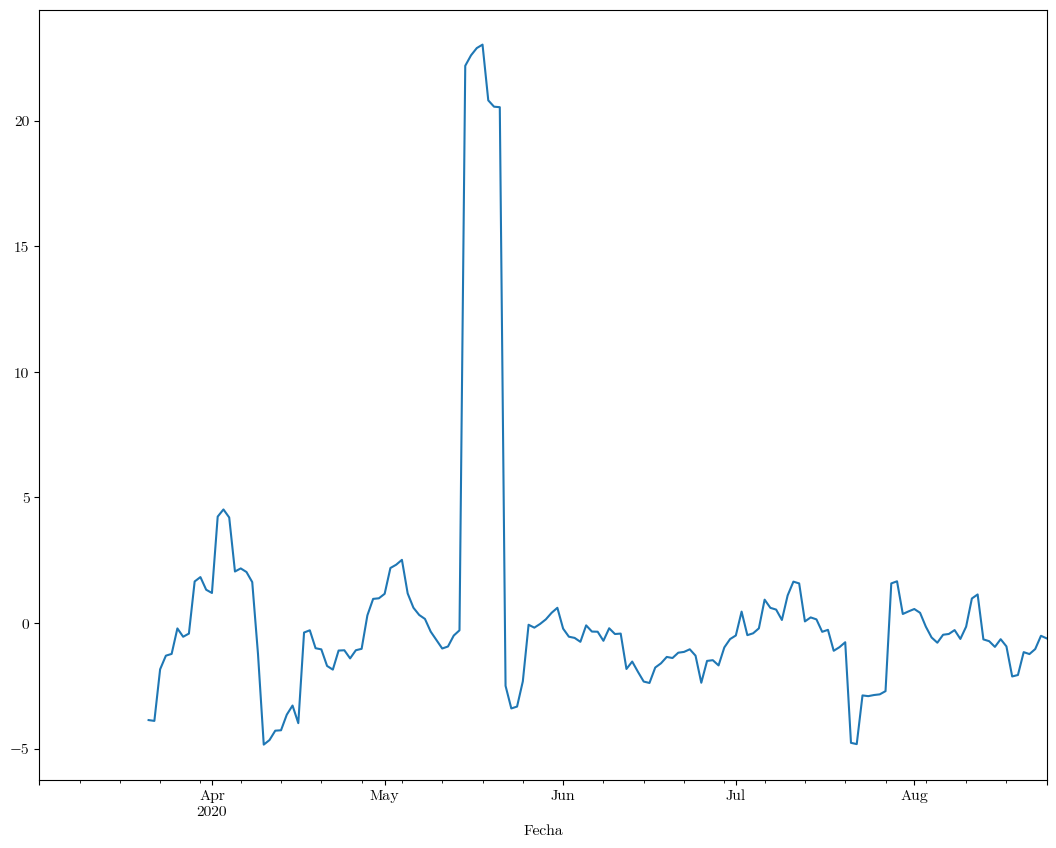

In [80]:
df3.diff().div(df3.diff().shift(1)).rolling(7).mean().plot()

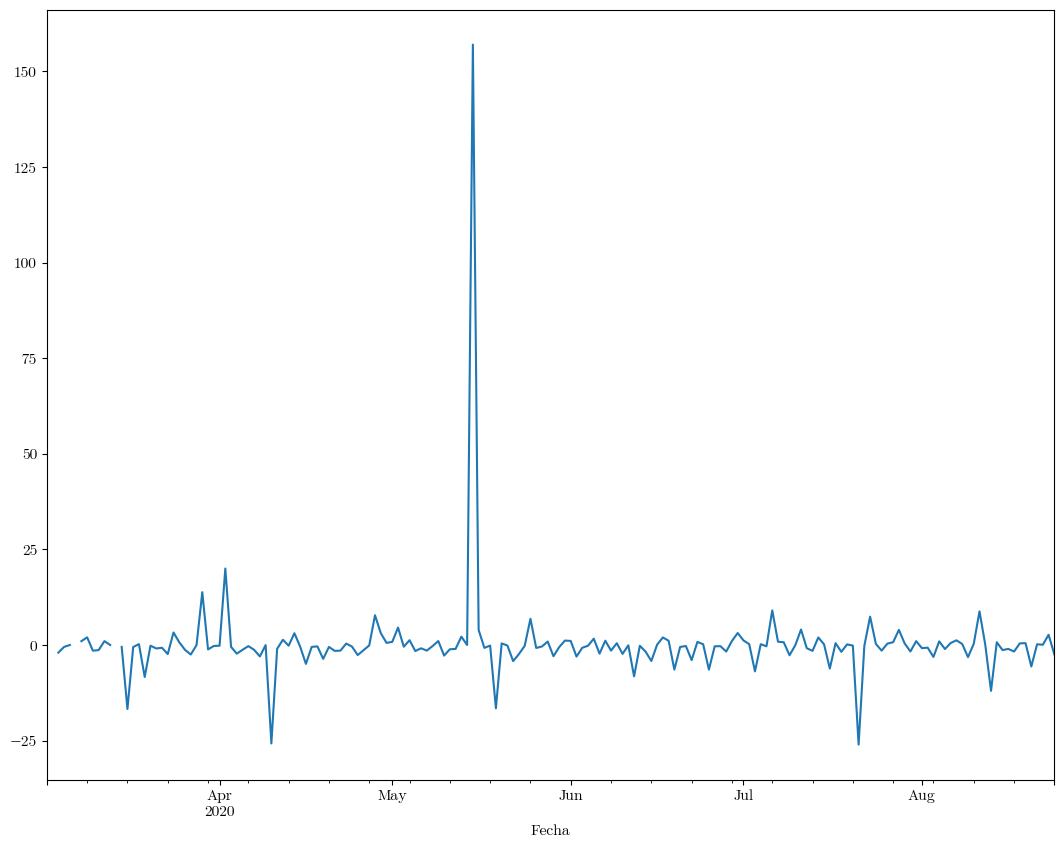

In [81]:
df3.diff().div(df3.diff().shift(1)).plot()